## Arabic Companies Reviews - Sentiment Analysis

Analyzing Arabic Companies Reviews and Building Sentiment Analysis Models


## Importing Libraries 

In [2]:
!pip install arabic_reshaper 
!pip install gradio 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 83.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 93.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.8.1 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have goog

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import time
import re
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier,\
ExtraTreesClassifier, RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,\
precision_score, recall_score, f1_score

from sklearn.utils import all_estimators
import joblib
import tensorflow as tf 
from keras.layers import TextVectorization , LSTM , Embedding , Dense ,Input 
from keras.models import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras import layers 
from sklearn.metrics import roc_curve, auc
import tensorflow as tf 
from keras import layers 
from tensorflow.keras.initializers import Constant
import tensorflow as tf
from tensorflow.keras import layers
from keras import regularizers
from keras.models import load_model
import random
import time
from tqdm import tqdm
import gradio as gr
import os
from pprint import pprint 


In [4]:
# Load Arabic stopwords from the NLTK library
arabic_stopwords = stopwords.words('arabic')

# Create a list of punctuation marks to be removed from the text
punctuations = [punc for punc in string.punctuation]

# Suppress any warnings to keep the output clean
warnings.filterwarnings('ignore')

# Set the style for matplotlib plots to 'seaborn' for better aesthetics
plt.style.use('seaborn-v0_8')

In [5]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Loading and preprocessing data 

In [6]:
# load data 
df=pd.read_csv('/kaggle/input/arabic-company-reviews/CompanyReviews.csv')
df 

,Unnamed: 0,review_description,rating,company
0,0,رائع,1,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat
...,...,...,...,...
40041,128,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,0,swvl
40042,129,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,-1,swvl
40043,130,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,0,swvl
40044,131,جيدا جدا ...ولكن الاسعار عاليه جدا\n,0,swvl


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          40046 non-null  int64 
 1   review_description  40045 non-null  object
 2   rating              40046 non-null  int64 
 3   company             40046 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [8]:
# dropping Unnamed: 0 column as it is useless  
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
# Check for any missing values in each column of the DataFrame

df.isnull().sum()

review_description    1
rating                0
company               0
dtype: int64

In [10]:
# dropping null data 
df.dropna(inplace=True)

In [11]:
# checking for duplicates 
df.duplicated().sum()

28

In [12]:
# dropping duplicates 
df.drop_duplicates(inplace=True)

In [13]:
# Count of reviews for each company in data 
df['company'].value_counts()

company
talbat           32071
swvl              4685
telecom_egypt     2090
venus              281
Raya               268
TMG                233
elsewedy           147
hilton             100
capiter             73
Ezz Steel           47
nestle              18
domty                4
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

#### Count of Reviews for each company in data 

In [14]:
# Count the number of reviews for each company in the dataset
# The result is sorted in descending order, so companies with the most reviews are listed first
companies_reviews_count = df['company'].value_counts().sort_values(ascending=False)

# Create a bar plot to visualize the count of reviews for each company
fig = px.bar(companies_reviews_count)

# Update the layout of the plot, setting the title for better context
fig.update_layout(title='Count of Reviews for each Company')

# Display the plot
fig.show()

#### Mean Raings values for each company 

In [15]:
# Calculate the average rating for each company by grouping the data by 'company' and taking the mean of 'rating'
# The resulting DataFrame is sorted in ascending order based on the average rating
companies_average_ratings = df.groupby('company')['rating'].mean().sort_values()

# Convert the Series to a DataFrame for easier manipulation
companies_average_ratings = pd.DataFrame(companies_average_ratings)

# Create a new column 'Color' based on the average rating:
# - Assign 'positive' if the rating is greater than or equal to 0
# - Assign 'negative' if the rating is less than 0
companies_average_ratings['Color'] = companies_average_ratings['rating'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Define a color map to specify colors for positive and negative ratings
color_map = {
    'positive': 'green',
    'negative': 'red'
}

# Create a bar chart using Plotly Express:
# - 'x' axis represents company names (index)
# - 'y' axis represents the average rating
# - Colors are assigned based on the 'Color' column using the defined color map
fig = px.bar(companies_average_ratings, x=companies_average_ratings.index, 
             y='rating', color='Color', color_discrete_map=color_map)

# Update the layout of the plot, setting the title for better context
fig.update_layout(title='Mean of Ratings for each Company')

# Display the plot
fig.show()


#### Count of Negative , Neutral and Positive Reviews For each Company 

In [16]:
# Get a predefined color sequence from Plotly. The 'Plotly' color scheme is one option,
# but you can choose others from plotly.colors if you prefer different aesthetics.
colors = px.colors.qualitative.Plotly

# Create a dictionary to map each company to a unique color from the chosen color sequence.
# The color selection uses modulo operation to cycle through the color list if the number of companies exceeds the color list length.
color_map = {company: colors[i % len(colors)] for i, company in enumerate(df['company'].unique())}

# Loop through each unique company in the dataset
for company in df['company'].unique():
    # Filter the dataframe to get only the rows corresponding to the current company
    temp_df = df[df['company'] == company]
    
    # Calculate the count of each rating value and sort the counts in ascending order
    ratings_count = temp_df['rating'].value_counts().sort_values()

    # Create a bar plot for the current company's rating counts, using the unique color assigned in the color_map
    fig = px.bar(ratings_count, color_discrete_sequence=[color_map[company]])
    
    # Update the layout of the plot with a title indicating which company's ratings are being displayed
    fig.update_layout(title=f'Count of Ratings for {company}')

    # Display the plot
    fig.show()


#### percentage of Negative , Neutral and Positive Reviews for each Company 

In [17]:
# Import plotly color sequences
colors = px.colors.qualitative.Plotly  # You can choose any other color sequence as well

# Create a dictionary to map each company to a unique color
color_map = {company: colors[i % len(colors)] for i, company in enumerate(df['company'].unique())}

# Loop through each unique company in the dataset
for company in df['company'].unique():
    # Filter the dataframe to get only the rows corresponding to the current company
    temp_df = df[df['company'] == company]
    
    # Calculate the count of each rating value and sort the counts in ascending order
    ratings_count = temp_df['rating'].value_counts().sort_values()

    # Create a pie chart for the current company with a unique color
    fig = px.pie(ratings_count, names=ratings_count.index, values=ratings_count.values)
    
    # Update the layout of the pie chart with a title that includes the company's name
    fig.update_layout(title=f'Count of Ratings for {company}')

    # Show the plot
    fig.show()


### Analysis of review describtion 

In [18]:
# Font for Arabic words to be displayed
font_file = '/kaggle/input/arial-font/arial.ttf'

def column_to_wordcloud(df: pd.DataFrame, column: str, font_file: str, stopwords: list) -> None:
    """
    Generates and displays a word cloud from a specified column in a dataframe.
    
    Parameters:
      df (pd.DataFrame): The dataframe containing the text data.
      column (str): The name of the column containing the text.
      font_file (str): The path to the font file for Arabic characters.
      stopwords (list): A list of words to exclude from the word cloud.

    Outputs:
        None. The function displays the word cloud image directly.
    """
    
    # Combine all text from the specified column, dropping any missing values
    text = " ".join(arabic_reshaper.reshape(t) for t in df[column].dropna())
    
    # Tokenize the text and filter out stopwords and punctuation
    arabic_stopwords=[arabic_reshaper.reshape(word) for word in stopwords]
    text = ' '.join(word for word in word_tokenize(text) if word not in arabic_stopwords and word not in punctuations)
    
    # Create and configure the word cloud object
    wordcloud = WordCloud(
        font_path=font_file,         # Specify the font path for Arabic characters
        width=3500,                  # Set the width of the word cloud image
        height=2000,                 # Set the height of the word cloud image
        random_state=1,              # Ensure reproducibility of the word cloud
        background_color='white',    # Set the background color of the word cloud
        colormap='Set2',             # Set the color map for the word cloud
        collocations=False           # Avoid combining adjacent words into phrases
    ).generate(text)
    
    # Display the generated word cloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide the axis
    plt.show()       # Show the plot


#### Analysis of Negative Reviews 

In [19]:
# getting arabic stopwords 
arabic_stopwords=stopwords.words('arabic')

def get_tokens_count(rating: int) -> dict:
    """
    Counts the frequency of tokens in reviews with a specific rating.

    Parameters:
      rating (int): The rating for which to filter the reviews.

    Returns:
      dict: A dictionary with tokens as keys and their counts as values.
    """
    
    # Join all review descriptions with the specified rating into a single text
    positive_text = ' '.join(df[df['rating'] == rating]['review_description'].values)
    
    # Tokenize the combined text
    tokens = word_tokenize(positive_text)
    
    # Filter out stopwords and punctuations from the tokens
    tokens = [token for token in tokens if token not in arabic_stopwords and token not in punctuations]
    
    # Count the frequency of each token
    tokens_count = Counter(tokens)
    
    return tokens_count

# Get and sort the most frequent negative words
most_frequent_negative_words = sorted(get_tokens_count(rating=-1).items(), reverse=True, key=lambda x: x[-1])[:15]

# Print the top 15 most frequent negative words
print(most_frequent_negative_words)


[('جدا', 2296), ('التطبيق', 1690), ('تطبيق', 1600), ('مش', 1539), ('الطلب', 1399), ('انا', 1124), ('...', 981), ('برنامج', 909), ('البرنامج', 880), ('فاشل', 783), ('التوصيل', 740), ('سيء', 676), ('طلبات', 664), ('خدمة', 598), ('طلبت', 585)]


In [20]:
def reverse_arabic_text(text: str ) -> str :
    """
    Reverses the order of Arabic characters in the given text.
    This function preserves the order of non-Arabic characters and whitespace.
    """
    # Unicode range for Arabic characters
    arabic_range = ('\u0600', '\u06FF')
    
    # Split the text into words
    words = text.split()
    
    # Process each word
    reversed_words = []
    for word in words:
        # If the word contains Arabic characters, reverse it
        if any(arabic_range[0] <= char <= arabic_range[1] for char in word):
            reversed_word = word[::-1]
        else:
            reversed_word = word
        reversed_words.append(reversed_word)
    
    # Join the processed words back into a string
    return ' '.join(reversed_words)



In [151]:
def dilsplay_most_frequent_tokens(most_frequent_words: list[tuple[str, int]],title:str) -> None:
    """
    Displays a bar chart of the most frequent tokens and their counts.

    Parameters:
      most_frequent_words (list of tuples): A list where each tuple contains a token (str) and its count (int).

    Returns:
      None: The function displays a bar chart but does not return any value.
    """
    
    counts = []  # List to store token counts
    tokens = []  # List to store token names

    # Iterate through the list of most frequent words
    for token, count in most_frequent_words:
        counts.append(count)  # Append the count to the counts list
        tokens.append(reverse_arabic_text(str(token)))  # Convert token to a string, reverse it for display, and append to tokens list

    # Create and display the bar chart
    plt.figure(figsize=(14, 7))  # Set the figure size
    plt.title(title)
    plt.bar(tokens, counts)  # Plot the bar chart with tokens on the x-axis and counts on the y-axis
    plt.ylabel('Count')  # Set the label for the y-axis
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()  # Display the bar chart


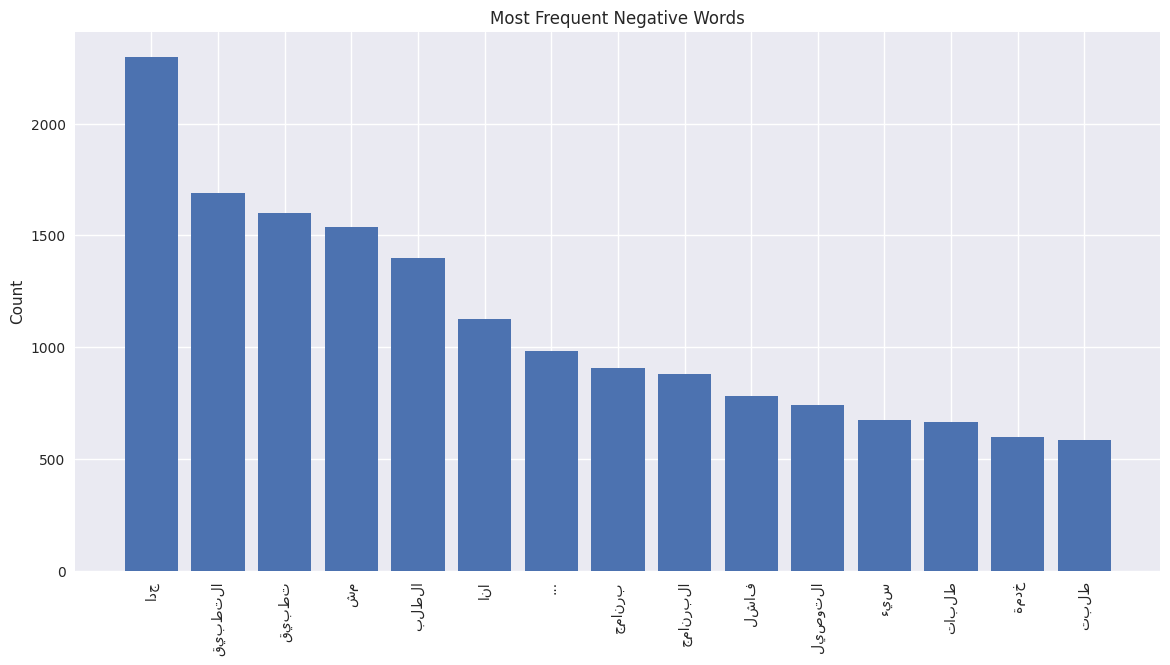

In [152]:
# generate and show a bar chart of the most frequent negative words with their counts.
dilsplay_most_frequent_tokens(most_frequent_negative_words,title='Most Frequent Negative Words')

Negative Reviews


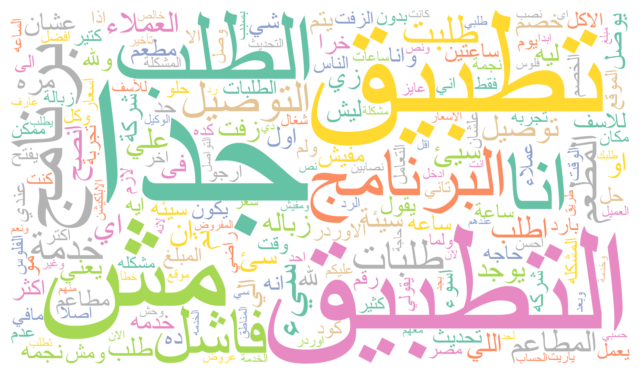

In [23]:
# Display wordcloud of Negative reviews 

print('Negative Reviews')
column_to_wordcloud(df[df['rating']==-1],'review_description',font_file,arabic_stopwords)

#### Analysis of Positive Reviews 

In [24]:
most_frequent_positive_words=sorted(get_tokens_count(rating=1).items(),reverse=True,key=lambda x : x[-1])[:15]
print(most_frequent_positive_words)

[('جدا', 3770), ('ممتاز', 2466), ('تطبيق', 2167), ('جميل', 1586), ('رائع', 1505), ('برنامج', 1384), ('التطبيق', 1304), ('حلو', 1151), ('البرنامج', 990), ('المطاعم', 871), ('الطلب', 760), ('طلبات', 740), ('التوصيل', 714), ('انا', 710), ('الله', 683)]


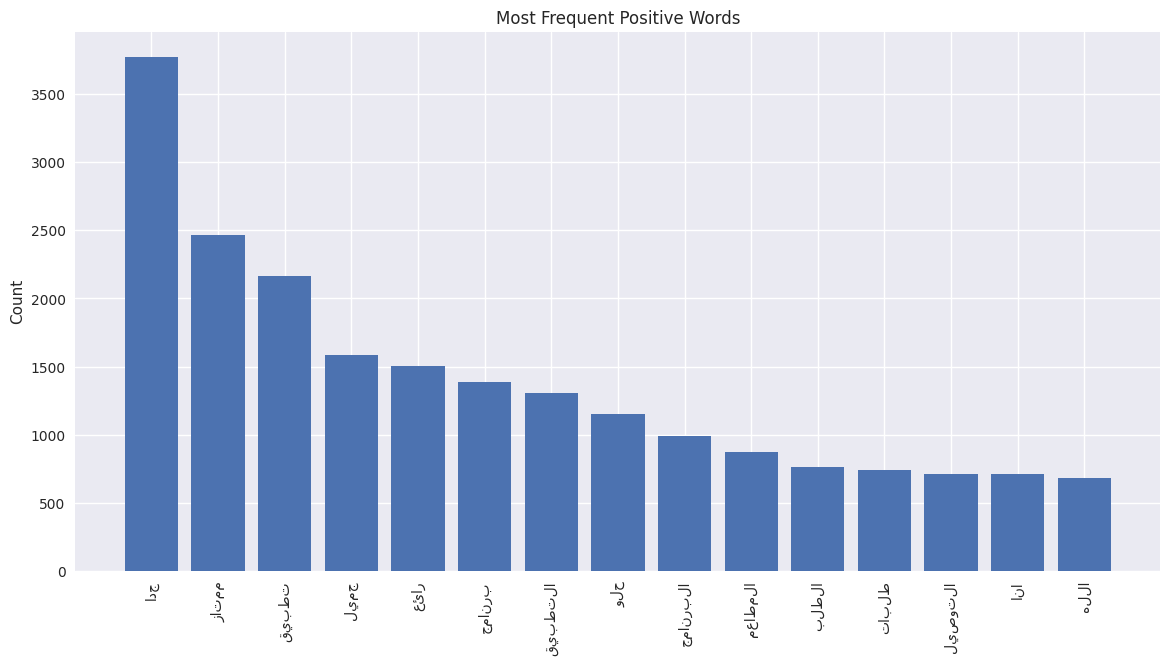

In [153]:
# generate and show a bar chart of the most frequent Positive words with their counts.

dilsplay_most_frequent_tokens(most_frequent_positive_words,title='Most Frequent Positive Words')    

Positive Reviews


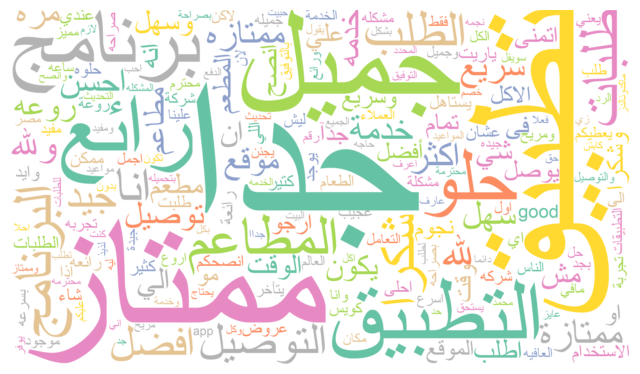

In [26]:
# Display wordcloud of Positive reviews 
print('Positive Reviews')
while 1: 
    try :     
        column_to_wordcloud(df[df['rating']==1].sample(frac=.3),'review_description',font_file,arabic_stopwords)
        break 
    except : 
        pass 

### Analysis of reviews length

In [27]:
# adding column length of reviews to data 
df['length']=df.review_description.apply(lambda x : len(x))
df 

,review_description,rating,company,length
0,رائع,1,talbat,4
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat,52
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat,84
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat,34
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat,75
...,...,...,...,...
40041,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,0,swvl,111
40042,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,-1,swvl,62
40043,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,0,swvl,80
40044,جيدا جدا ...ولكن الاسعار عاليه جدا\n,0,swvl,35


In [28]:
# Calculate the 95th percentile for text length in the 'length' column
length_limit = np.percentile(df['length'], 95)

# Print the length limit where 95% of the text data is shorter than this value
print(f'95% of text is shorter than {length_limit} characters')

95% of text is shorter than 171.0 characters


In [29]:
import plotly.figure_factory as ff 

# Create a distribution plot for the 'length' column using Plotly
fig = ff.create_distplot([df['length'].tolist()], ['Length Distribution'])
fig.update_layout(title='Distribution of length of all reviews')
# Show the plot
fig.show()

In [30]:
def clear_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.
    
    Parameters:
    - df: The input DataFrame containing the data.
    - column: The name of the column from which to remove outliers.
    
    Returns:
    - A DataFrame with outliers removed from the specified column.
    """
    
    # Extract the column values as a list
    values = df[column].tolist()
    
    # Calculate the 75th and 25th percentiles of the column values
    upper_limit = np.percentile(values, 75)
    lower_limit = np.percentile(values, 25)
    
    # Calculate the Interquartile Range (IQR)
    iqr = upper_limit - lower_limit
    
    # Define bounds for outliers
    upper_bound = upper_limit + 1.5 * iqr
    lower_bound = lower_limit - 1.5 * iqr
    
    # Filter out the outliers based on the defined bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned
cleaned_outliers_data=clear_outliers(df,'length')
cleaned_outliers_data

,review_description,rating,company,length
0,رائع,1,talbat,4
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat,52
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat,84
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat,34
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat,75
...,...,...,...,...
40041,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,0,swvl,111
40042,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,-1,swvl,62
40043,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,0,swvl,80
40044,جيدا جدا ...ولكن الاسعار عاليه جدا\n,0,swvl,35


In [31]:
# Calculate the number of outliers in the data by subtracting the number of rows in the cleaned DataFrame 
outliers_count = df.shape[0] - cleaned_outliers_data.shape[0]

print(f'Number of outliers in data: {outliers_count}')


Number of outliers in data: 3352


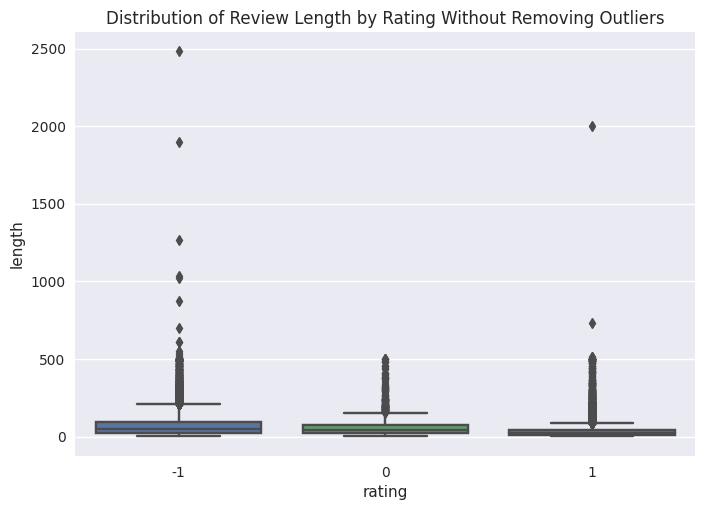

In [32]:
# Create a boxplot to visualize the distribution of review lengths by rating
sns.boxplot(df, x='rating', y='length')

# Add a title to the plot
plt.title('Distribution of Review Length by Rating Without Removing Outliers')

# Display the plot
plt.show()

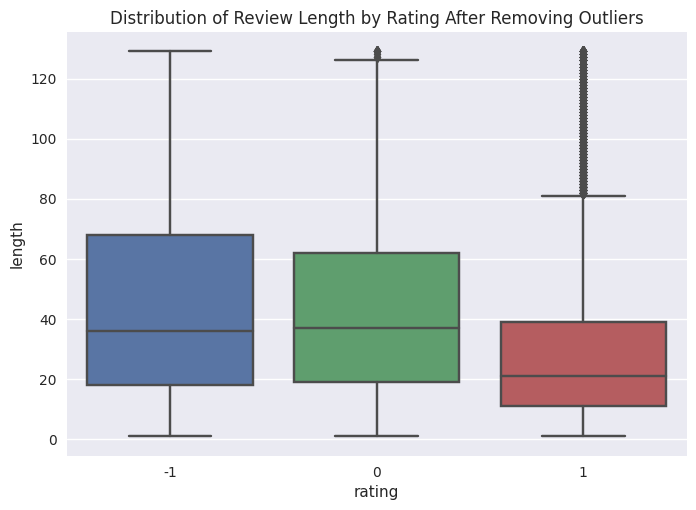

In [33]:
# Create a boxplot to visualize the distribution of review lengths by rating after removing outliers
sns.boxplot(cleaned_outliers_data, x='rating', y='length')

# Add a title to the plot
plt.title('Distribution of Review Length by Rating After Removing Outliers')

# Display the plot
plt.show()

* From the boxplot above, which shows the distribution of text lengths for Negative, Neutral, and Positive Reviews, it is evident that:
  - **Negative Reviews** are generally longer compared to **Neutral Reviews**.
  - **Positive Reviews** tend to be shorter than **Neutral Reviews**.


## Classification models 

> we are going to drop Neutral reviews from data as it's count is too small compared to negative and positive reviews.

In [34]:
# dropping neutral reviews data 
cleaned_df=df[df['rating']!=0]
 

In [35]:
# Features: Extracting the review descriptions as features
X = cleaned_df.review_description

# Target: Extracting the ratings as the target variable
y = cleaned_df.rating 
y=y.replace({-1:0})
# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,            # Feature data (review descriptions)
    y,            # Target data (ratings)
    test_size=0.2, # Fraction of the data to be used for testing (20%)
    random_state=42 # Seed for the random number generator to ensure reproducibility
)


In [36]:
def plot_confusion_matrix(
    y_true: np.ndarray, 
    y_pred: np.ndarray, 
    classes: list, 
    normalize: bool = False, 
    title: str = 'Confusion matrix', 
    cmap: plt.cm = plt.cm.Blues
) -> None:
    """
    This function computes and plots the confusion matrix for the given true and predicted labels.

    Parameters:
    - y_true (np.ndarray): Array of true labels.
    - y_pred (np.ndarray): Array of predicted labels.
    - classes (list): List of class names for labeling the axes.
    - normalize (bool, optional): Whether to normalize the confusion matrix. Default is False.
    - title (str, optional): Title for the plot. Default is 'Confusion matrix'.
    - cmap (plt.cm, optional): Colormap for the heatmap. Default is plt.cm.Blues.

    Returns:
    - None. The function plots the confusion matrix.
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        # Normalize the confusion matrix by dividing by the row sums
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Create a figure for the plot
    plt.figure(figsize=(10, 8))
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(
        cm, 
        annot=True,  # Annotate cells with the numeric value
        fmt='.2f' if normalize else 'd',  # Format of the annotations
        cmap=cmap  # Colormap for the heatmap
    )
    
    # Set the title and labels
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Set the ticks for the x and y axes
    plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
    plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)
    
    # Adjust layout to fit the plot elements
    plt.tight_layout()
    
    # Display the plot
    plt.show()

def calculate_metrics(y_true, y_pred,average='binary'):
    """
    Calculate precision, recall, F1 score, and accuracy.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    dict: A dictionary containing precision, recall, F1 score, and accuracy.
    """
    
    # Calculate precision
    precision = precision_score(y_true, y_pred, average=average)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred, average=average)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average=average)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Create a dictionary to store the metrics
    metrics = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy
    }
    
    return metrics

In [37]:
# Initialize CountVectorizer with specific parameters
# max_features: Limit the number of features to 10,000 based on the most frequent words
# min_df: Ignore words that appear in fewer than 2 documents
# max_df: Ignore words that appear in more than 95% of the documents
vectorizer = CountVectorizer(max_features=10000, min_df=2, max_df=0.95)

# Fit the vectorizer on the training data and transform the training text data into feature vectors
X_train_v = vectorizer.fit_transform(X_train)

# Transform the test text data into feature vectors using the already fitted vectorizer
X_test_v = vectorizer.transform(X_test)
print('Vectorized Test Text:\n',X_test_v.toarray())

# saving vectorizer 
joblib.dump(vectorizer,'count_vectorizer.pkl') 

Vectorized Test Text:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['count_vectorizer.pkl']

### Multinominal Naive Bayes  

Utilizing MultinomialNB
Cross validation F1 macro results:
 [0.857 0.851 0.862 0.852 0.855]
Mean of F1 macro for Cross validation:
0.855
Standard Deviation of F1 macro for Cross validation:
0.004
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2898
           1       0.88      0.91      0.89      4721

    accuracy                           0.87      7619
   macro avg       0.86      0.85      0.86      7619
weighted avg       0.87      0.87      0.87      7619

##################################################
Normalized confusion matrix


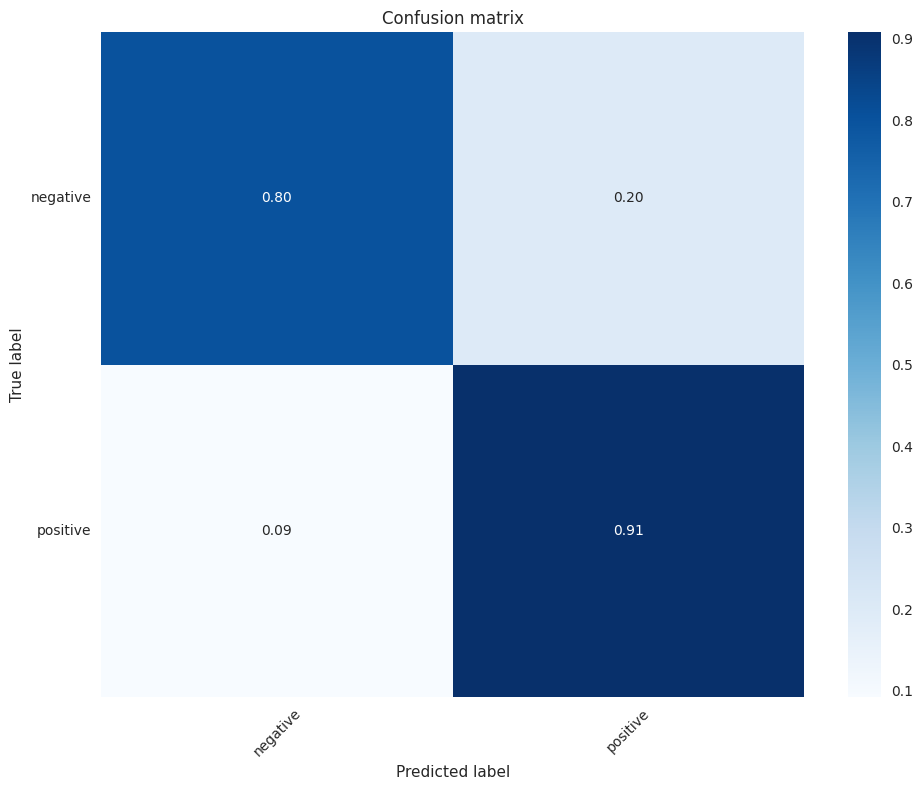

##################################################
{'precision': 0.8809621710526315, 'recall': 0.9076466850243593, 'f1_score': 0.8941053729786124, 'accuracy': 0.8667804173776086}
Model saved successfully


In [38]:
def evaluate_classifier(classifier, save_model=False):
    """
    Evaluate a classifier using cross-validation, confusion matrix, and classification report.
    
    Args:
    classifier: The classifier object to evaluate
    save_model (bool): Whether to save the trained model to disk
    
    Returns:
    None
    """
    # Remove parentheses from classifier name for cleaner output
    classifier_name = re.sub('\(\)', '', str(classifier))
    
    # Create a pipeline with CountVectorizer and the classifier
    model = Pipeline([
        ('vectorizer', CountVectorizer(max_features=10000)),
        ('classifier', classifier)
    ])
    
    # Perform cross-validation
    model_cross_validation = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1_macro')
    
    # Print cross-validation results
    cleaned_classifier = re.sub('\(\)', '', str(classifier))
    print(f"Utilizing {cleaned_classifier}")
    print(f'Cross validation F1 macro results:\n {np.round(model_cross_validation, 3)}')
    print(f'Mean of F1 macro for Cross validation:\n{np.round(model_cross_validation.mean(), 3)}')
    print(f'Standard Deviation of F1 macro for Cross validation:\n{np.round(model_cross_validation.std(), 3)}')
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_1 = model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred_1))
    print('#' * 50)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_1, classes=['negative', 'positive'], normalize=True)
    print('#'*50)
    print(calculate_metrics(y_test,y_pred_1))
    # Save the model if requested
    if save_model:
        joblib.dump(model, f'{classifier_name}.pkl')
        print('Model saved successfully')

evaluate_classifier(MultinomialNB(),save_model=True)

#### loading and evaluating Saved Multinomianl Naive Bayes Model 

In [39]:
def load_evaluate_model(model_path): 
    # Load the previously saved MultinomialNB model from the file
    loded_model = joblib.load(model_path)

    # Predict the target values on the test data using the loaded MultinomialNB model
    y_pred= loded_model.predict(X_test)

    loaded_model_results= calculate_metrics(y_test, y_pred)
    return loaded_model_results
print('Results for loaded multinominal naive bayes model')
multinominal_nb_results=load_evaluate_model('/kaggle/working/MultinomialNB.pkl')
multinominal_nb_results

Results for loaded multinominal naive bayes model


{'precision': 0.8809621710526315,
 'recall': 0.9076466850243593,
 'f1_score': 0.8941053729786124,
 'accuracy': 0.8667804173776086}

In [40]:
all_experiments_results={}
all_experiments_results['Multinominal_nb']=multinominal_nb_results
all_experiments_results

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086}}

In [41]:
def plot_learning_curve(model):
    """
    Plots the learning curve for a given machine learning model using training and validation scores.

    This function computes and visualizes the learning curve by plotting training and validation scores 
    against the size of the training set. It also shows the standard deviation of the scores as shaded areas.

    Parameters:
        model: The machine learning model to evaluate. It should be an estimator with a `fit` method.

    Returns:
        None. The function displays the learning curve plot.
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X_train_v,
        y=y_train,
        cv=5,
        scoring='f1_macro',
        n_jobs=-1,
        random_state=42
    )

    # Calculate the mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    model_name = re.sub(r'\(\)', '', str(model))
    print(f'Learning Curve for model: {model_name}')

    # Create the plotly figure
    fig = go.Figure()

    # Add training scores mean line
    fig.add_trace(go.Scatter(
        x=train_sizes, y=train_scores_mean,
        mode='lines+markers',
        name='Training score',
        line=dict(color='red')
    ))

    # Add validation scores mean line
    fig.add_trace(go.Scatter(
        x=train_sizes, y=val_scores_mean,
        mode='lines+markers',
        name='Validation score',
        line=dict(color='green')
    ))

    # Add training scores standard deviation shaded area
    fig.add_trace(go.Scatter(
        x=np.concatenate([train_sizes, train_sizes[::-1]]),
        y=np.concatenate([train_scores_mean - train_scores_std, (train_scores_mean + train_scores_std)[::-1]]),
        fill='toself',
        fillcolor='rgba(255, 0, 0, 0.1)',
        line=dict(color='rgba(255, 0, 0, 0)'),
        showlegend=False,
        name='Training score std'
    ))

    # Add validation scores standard deviation shaded area
    fig.add_trace(go.Scatter(
        x=np.concatenate([train_sizes, train_sizes[::-1]]),
        y=np.concatenate([val_scores_mean - val_scores_std, (val_scores_mean + val_scores_std)[::-1]]),
        fill='toself',
        fillcolor='rgba(0, 255, 0, 0.1)',
        line=dict(color='rgba(0, 255, 0, 0)'),
        showlegend=False,
        name='Validation score std'
    ))

    # Update layout
    fig.update_layout(
        title=f'Learning Curve for model: {model_name}',
        xaxis_title='Training Set Size',
        yaxis_title='F1 Macro Score',
        legend_title='Legend',
        template='plotly_white'
    )

    # Show plot
    fig.show()
    
plot_learning_curve(MultinomialNB())

Learning Curve for model: MultinomialNB


#### fine tunning multinominal naive bayes 

In [42]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}


gread_search=GridSearchCV(estimator=MultinomialNB(),param_grid=param_grid,scoring='f1_macro',n_jobs=-1,cv=5)
gread_search.fit(X_train_v,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'fit_prior': [True, False]},
             scoring='f1_macro')

In [43]:
gread_search.best_params_

{'alpha': 1.0, 'fit_prior': True}

In [44]:
gread_search.cv_results_

{'mean_fit_time': array([0.00823159, 0.00845079, 0.00901241, 0.00874219, 0.00895433,
        0.0085515 , 0.00877318, 0.0089191 , 0.00832901, 0.00850148,
        0.00873222, 0.00858498]),
 'std_fit_time': array([0.00094677, 0.00065834, 0.00076842, 0.00028652, 0.00036222,
        0.00026305, 0.00047587, 0.0020003 , 0.00108414, 0.00047787,
        0.00092488, 0.00028252]),
 'mean_score_time': array([0.00458336, 0.00457158, 0.00479317, 0.0049437 , 0.00430164,
        0.00480056, 0.00480404, 0.00458455, 0.00466509, 0.00471358,
        0.0043611 , 0.00424495]),
 'std_score_time': array([0.00013457, 0.00021367, 0.00023596, 0.00043473, 0.00064637,
        0.00043513, 0.00058688, 0.00020828, 0.00018446, 0.00045999,
        0.00016094, 0.00063469]),
 'param_alpha': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1.0, 1.0, 2.0, 2.0, 5.0, 5.0, 10.0,
                    10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
       

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2898
           1       0.88      0.91      0.89      4721

    accuracy                           0.87      7619
   macro avg       0.86      0.85      0.86      7619
weighted avg       0.87      0.87      0.87      7619

Normalized confusion matrix


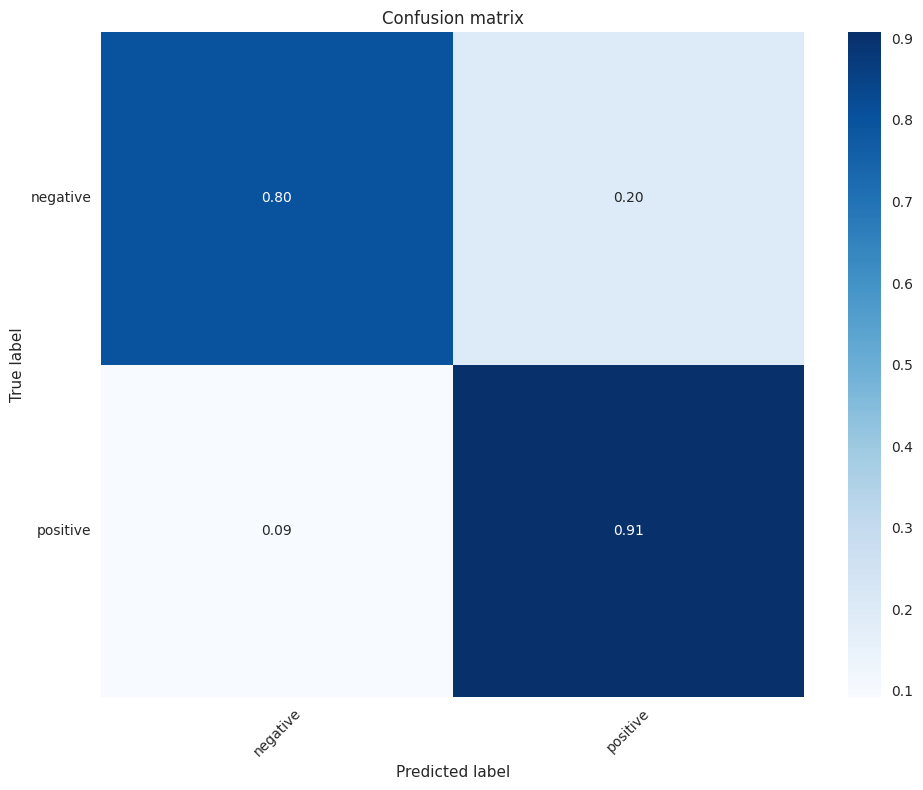

In [45]:
tunned_nb=gread_search.best_estimator_
y_pred_5=tunned_nb.predict(X_test_v)
print(classification_report(y_test,y_pred_5))
plot_confusion_matrix(y_test,y_pred_5,classes=['negative','positive'],normalize=True)

### logistic regression 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Utilizing LogisticRegression
Cross validation F1 macro results:
 [0.853 0.849 0.848 0.852 0.852]
Mean of F1 macro for Cross validation:
0.851
Standard Deviation of F1 macro for Cross validation:
0.002
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      2898
           1       0.85      0.94      0.89      4721

    accuracy                           0.86      7619
   macro avg       0.87      0.84      0.85      7619
weighted avg       0.86      0.86      0.86      7619

##################################################
Normalized confusion matrix


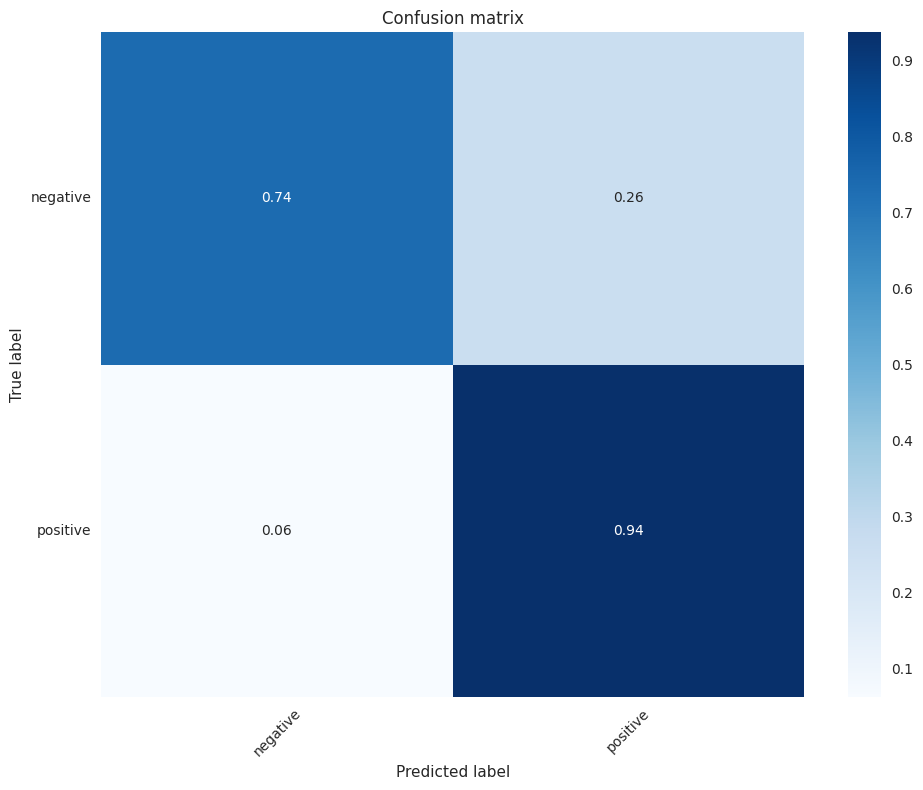

##################################################
{'precision': 0.8532870638133796, 'recall': 0.93751323872061, 'f1_score': 0.8934194590230117, 'accuracy': 0.8613991337445859}
Model saved successfully


In [46]:
evaluate_classifier(LogisticRegression(),save_model=True)

In [47]:

print('Results for loaded logistic regression model')
logstic_regression_results=load_evaluate_model(model_path='/kaggle/working/LogisticRegression.pkl')
logstic_regression_results 

Results for loaded logistic regression model


{'precision': 0.8532870638133796,
 'recall': 0.93751323872061,
 'f1_score': 0.8934194590230117,
 'accuracy': 0.8613991337445859}

In [48]:
all_experiments_results['Logistic_Regression']=logstic_regression_results
all_experiments_results

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859}}

In [49]:
plot_learning_curve(LogisticRegression())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Learning Curve for model: LogisticRegression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#### fine tunning LogisticRegression

In [50]:
lo_param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'C': np.logspace(-4, 4, 20),  # Regularization strength: 20 values from 0.0001 to 10000
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Optimization algorithm
    'max_iter': [100, 200, 500, 1000],  # Maximum number of iterations
    'l1_ratio': np.linspace(0, 1, 10)  # Used only when penalty is 'elasticnet': 10 values between 0 and 1
}

random_search=RandomizedSearchCV(estimator=LogisticRegression(),
                                 param_distributions=lo_param_dist,cv=3,n_iter=5,scoring='f1',n_jobs=-1,
                                 random_state=42 )
random_search.fit(X_train_v,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [100, 200, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'newton-cg']},
                   random_state=42, scoring='f1')

In [51]:
random_search.best_score_

0.8938699199259119

In [52]:
new_params=random_search.best_params_
new_params['C']=4

In [53]:
tunned_lo=LogisticRegression(**new_params)
tunned_lo.fit(X_train_v,y_train)
y_pred_6=tunned_lo.predict(X_test_v)
print('Results for fine tunned Logstic Regression')
print(classification_report(y_test,y_pred_6))
print(calculate_metrics(y_test,y_pred_6))

Results for fine tunned Logstic Regression
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2898
           1       0.86      0.93      0.89      4721

    accuracy                           0.86      7619
   macro avg       0.86      0.84      0.85      7619
weighted avg       0.86      0.86      0.86      7619

{'precision': 0.8614718614718615, 'recall': 0.9273459012920992, 'f1_score': 0.8931959604202795, 'accuracy': 0.8625803911274446}


### SGD 

Utilizing SGDClassifier
Cross validation F1 macro results:
 [0.848 0.839 0.841 0.847 0.843]
Mean of F1 macro for Cross validation:
0.844
Standard Deviation of F1 macro for Cross validation:
0.003
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      2898
           1       0.84      0.94      0.89      4721

    accuracy                           0.85      7619
   macro avg       0.86      0.83      0.84      7619
weighted avg       0.86      0.85      0.85      7619

##################################################
Normalized confusion matrix


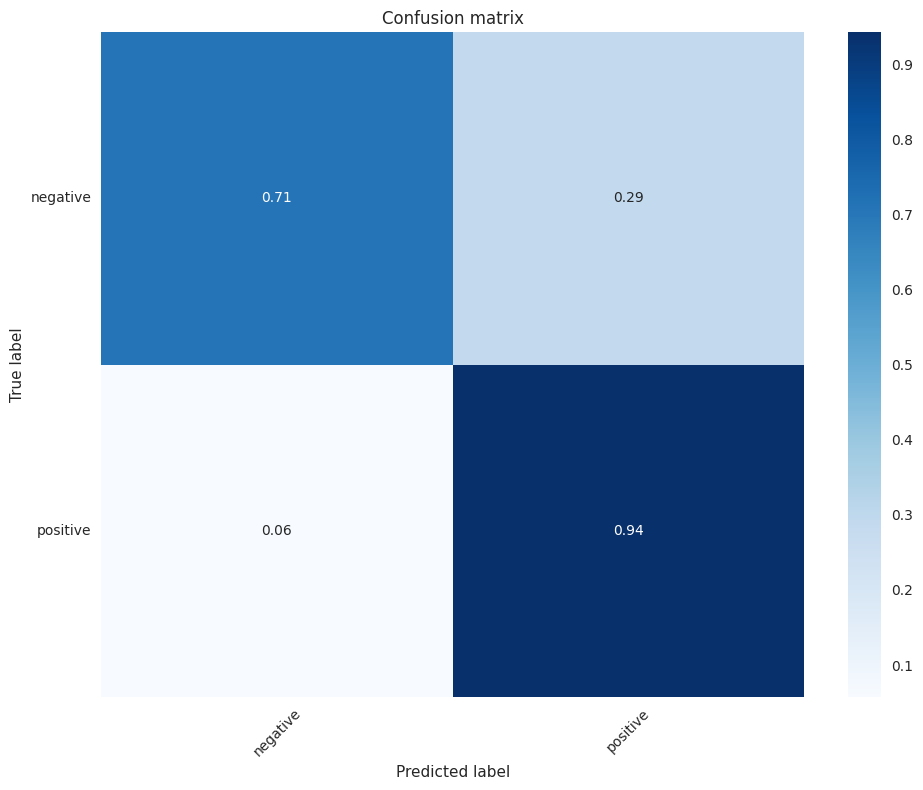

##################################################
{'precision': 0.8401964488099736, 'recall': 0.9421732683753442, 'f1_score': 0.8882675986020969, 'accuracy': 0.8531303320645754}
Model saved successfully


In [54]:

evaluate_classifier(SGDClassifier(),save_model=True)

In [55]:
print('Results for loaded Stochastic Gradient Descent (SGD) model')
sgd_results=load_evaluate_model(model_path='/kaggle/working/SGDClassifier.pkl')
sgd_results 

Results for loaded Stochastic Gradient Descent (SGD) model


{'precision': 0.8401964488099736,
 'recall': 0.9421732683753442,
 'f1_score': 0.8882675986020969,
 'accuracy': 0.8531303320645754}

In [56]:
all_experiments_results['SGD']=sgd_results 
all_experiments_results 

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754}}

In [57]:
plot_learning_curve(SGDClassifier())

Learning Curve for model: SGDClassifier


In [58]:
all_estimators(type_filter='classifier')

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('ClassifierChain', sklearn.multioutput.ClassifierChain),
 ('ComplementNB', sklearn.naive_bayes.ComplementNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('GaussianProcessClassifier',
  sklearn.gaussian_process._gpc.GaussianProcessClassifier),
 ('GradientBoostingClassifier',
  sklearn.ensemble._gb.GradientBoostingClassifier),
 ('HistGradientBoostingClassifier',
  sklearn.ensemble._hist_gradi

### Perceptron 

Utilizing Perceptron
Cross validation F1 macro results:
 [0.823 0.816 0.793 0.829 0.813]
Mean of F1 macro for Cross validation:
0.815
Standard Deviation of F1 macro for Cross validation:
0.012
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2898
           1       0.86      0.86      0.86      4721

    accuracy                           0.83      7619
   macro avg       0.82      0.82      0.82      7619
weighted avg       0.83      0.83      0.83      7619

##################################################
Normalized confusion matrix


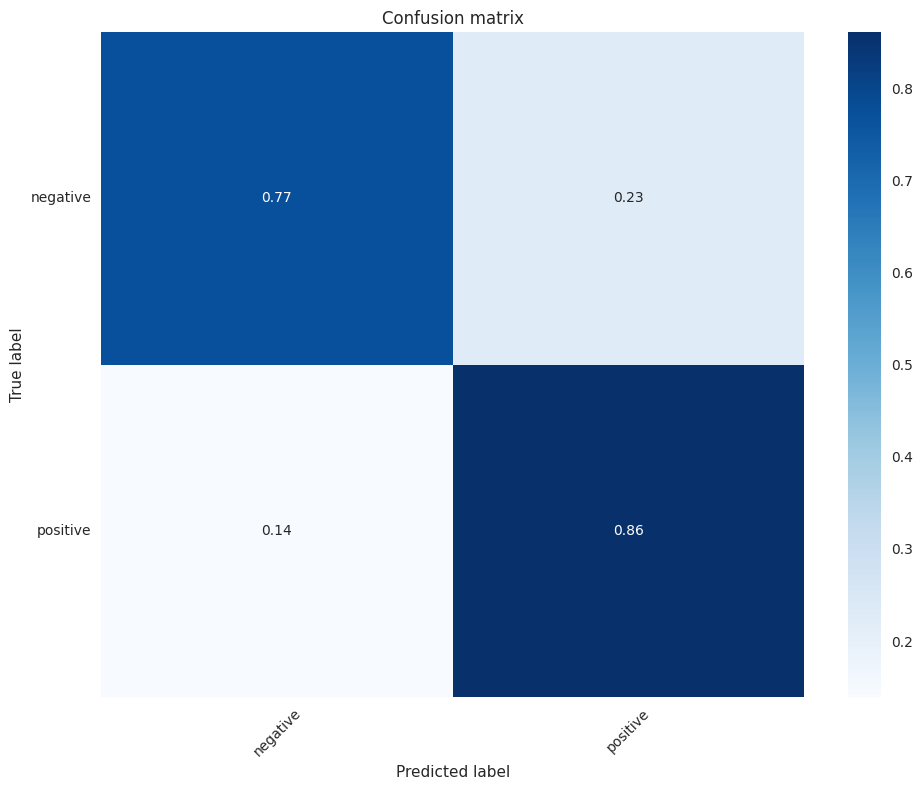

##################################################
{'precision': 0.8593188068542416, 'recall': 0.8604109298877356, 'f1_score': 0.8598645215918712, 'accuracy': 0.8262239138994619}
Model saved successfully


In [59]:
evaluate_classifier(Perceptron(),save_model=True)

In [60]:
print('Results for loaded Perceptron model')
perceptron_results=load_evaluate_model(model_path='/kaggle/working/Perceptron.pkl')
perceptron_results 

Results for loaded Perceptron model


{'precision': 0.8593188068542416,
 'recall': 0.8604109298877356,
 'f1_score': 0.8598645215918712,
 'accuracy': 0.8262239138994619}

In [61]:
all_experiments_results['Perceptron']=perceptron_results
all_experiments_results 

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754},
 'Perceptron': {'precision': 0.8593188068542416,
  'recall': 0.8604109298877356,
  'f1_score': 0.8598645215918712,
  'accuracy': 0.8262239138994619}}

In [62]:
plot_learning_curve(Perceptron())

Learning Curve for model: Perceptron


### stacking classifier 

Classification report               precision    recall  f1-score   support

           0       0.87      0.75      0.81      2898
           1       0.86      0.93      0.89      4721

    accuracy                           0.86      7619
   macro avg       0.87      0.84      0.85      7619
weighted avg       0.86      0.86      0.86      7619

Normalized confusion matrix


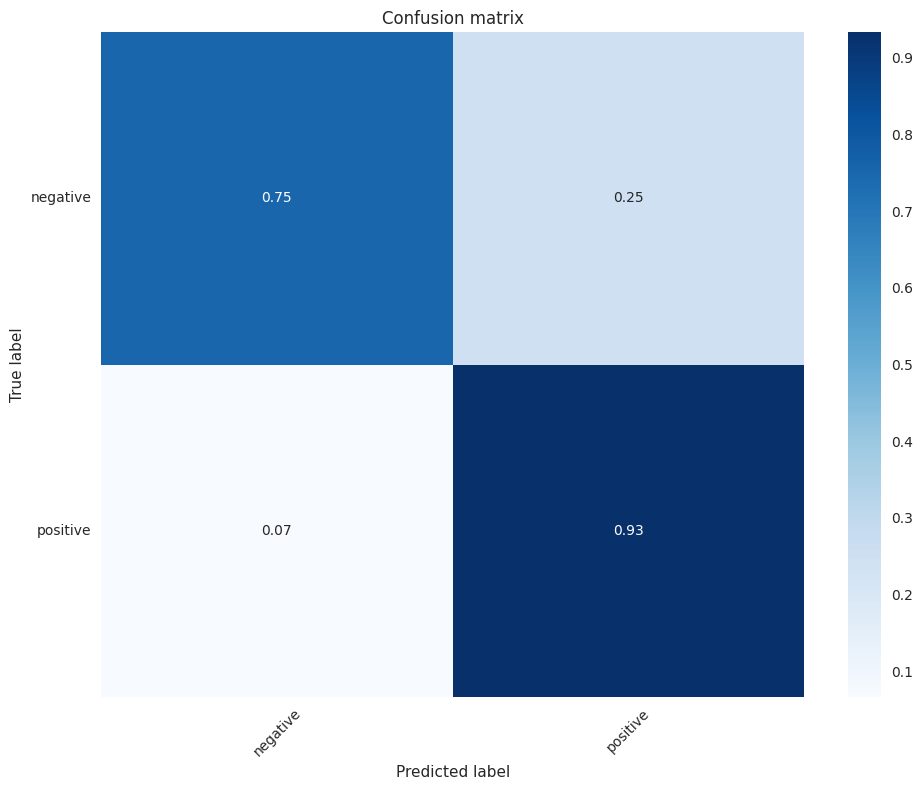

{'precision': 0.8591769065730447, 'recall': 0.9330650285956366, 'f1_score': 0.8945978878960195, 'accuracy': 0.8637616485103032}


In [63]:


# Define base models
base_models = [
    ('lr', LogisticRegression()),
    ('sgd', SGDClassifier()),
    ('perceptron', Perceptron())
]

# Use Logistic Regression as the meta-model

meta_model = LogisticRegression(max_iter=1000,solver='liblinear')

# Define the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # 5-fold cross-validation to generate meta-features
)


stacking_model.fit(X_train_v, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test_v)

# Evaluate the model
report = classification_report(y_test, y_pred)

print(f'Classification report {report}')
plot_confusion_matrix(y_test,y_pred,classes=['negative','positive'],normalize=True)
stacking_results=calculate_metrics(y_test,y_pred)
print(stacking_results)

#### saving , loading and evaluating loaded Stacking modle 

In [64]:
# saving stacking model 
joblib.dump(stacking_model,'stacking_model.pkl')


['stacking_model.pkl']

In [65]:

# Load the previously saved stacking model from the file
loaded_stacking_model = joblib.load('/kaggle/working/stacking_model.pkl')

# Load the previously saved CountVectorizer from the file
loaded_vectorizer = joblib.load('/kaggle/working/count_vectorizer.pkl')

# Transform the test data using the loaded CountVectorizer
vect_test = loaded_vectorizer.transform(X_test)

# Predict the target values on the test data using the loaded stacking model
y_pred_6 = loaded_stacking_model.predict(vect_test)

# Print the results of the loaded stacking model
print('Loaded Stacking Model Results:')
stacking_model_results=calculate_metrics(y_test,y_pred_6)
print(stacking_model_results)

Loaded Stacking Model Results:
{'precision': 0.8591769065730447, 'recall': 0.9330650285956366, 'f1_score': 0.8945978878960195, 'accuracy': 0.8637616485103032}


In [66]:
all_experiments_results['Stacking_model']=stacking_model_results
all_experiments_results 

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754},
 'Perceptron': {'precision': 0.8593188068542416,
  'recall': 0.8604109298877356,
  'f1_score': 0.8598645215918712,
  'accuracy': 0.8262239138994619},
 'Stacking_model': {'precision': 0.8591769065730447,
  'recall': 0.9330650285956366,
  'f1_score': 0.8945978878960195,
  'accuracy': 0.8637616485103032}}

In [67]:
# Define the stacking model with base models and a meta model
stacking_model = StackingClassifier(
    estimators=base_models,  # List of base models to use in the stacking classifier
    final_estimator=meta_model,  # Meta model to combine predictions of base models
    cv=5  # Number of folds for cross-validation to generate meta-features
)

# Plot the learning curve for the stacking model
plot_learning_curve(stacking_model)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Learning Curve for model: StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression),
                               ('sgd', SGDClassifier),
                               ('perceptron', Perceptron)],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      solver='liblinear'))


### voting classifier

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      2898
           1       0.86      0.94      0.89      4721

    accuracy                           0.86      7619
   macro avg       0.87      0.84      0.85      7619
weighted avg       0.86      0.86      0.86      7619

Normalized confusion matrix


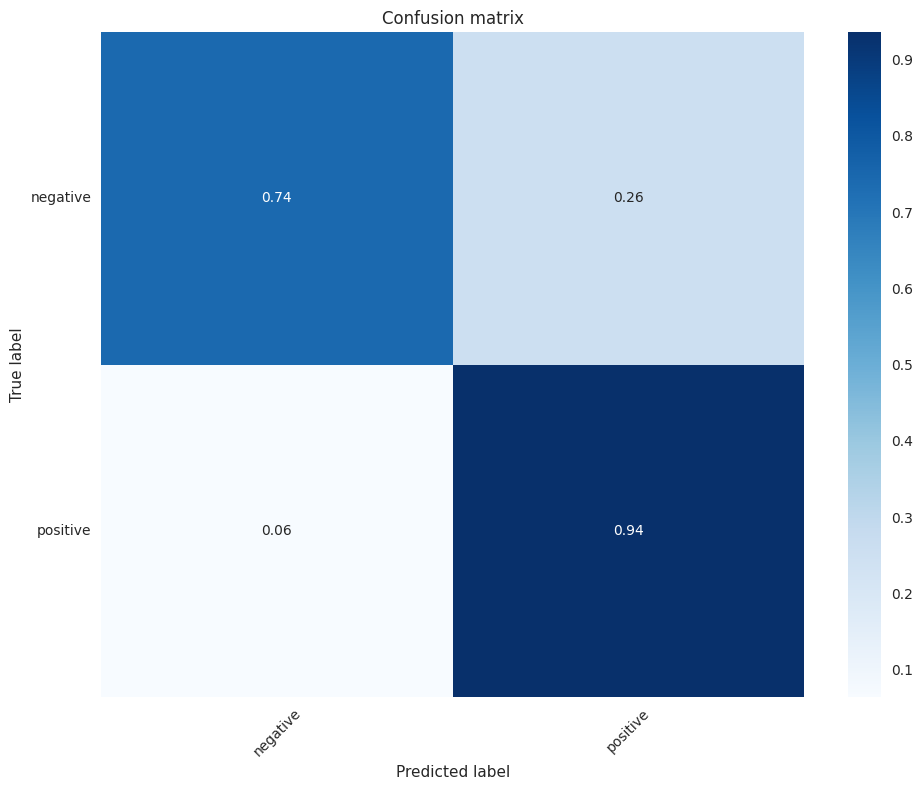

{'precision': 0.8563396665374176, 'recall': 0.9356068629527643, 'f1_score': 0.8942200627593886, 'accuracy': 0.8628428927680798}


In [68]:

# Define base models
log_clf = LogisticRegression()
sgd_clf = SGDClassifier()
perceptron_clf = Perceptron()

# Create a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('sgd', sgd_clf),
        ('perceptron', perceptron_clf)
    ],
    voting='hard'  # Use 'soft' for averaging probabilities
)

# Train the VotingClassifier
voting_clf.fit(X_train_v, y_train)

# Make predictions on the test set
y_pred_vot = voting_clf.predict(X_test_v)

# Evaluate the model
report = classification_report(y_test, y_pred_vot)
print(f'Classification report:\n{report}')
plot_confusion_matrix(y_test,y_pred_vot,classes=['negative','positive'],normalize=True)

print(calculate_metrics(y_test,y_pred_vot))

#### saving , loading and evaluting loaded voting model 

In [69]:
# saving voting model 
joblib.dump(voting_clf,'voting.pkl')  

['voting.pkl']

In [70]:

# Load the previously saved Voting model from the file
loaded_voting_model = joblib.load('/kaggle/working/voting.pkl')

# Load the previously saved CountVectorizer from the file
loaded_vectorizer = joblib.load('/kaggle/working/count_vectorizer.pkl')

# Transform the test data using the loaded CountVectorizer
vect_test = loaded_vectorizer.transform(X_test)

# Predict the target values on the test data using the loaded Voting model
y_pred_7 = loaded_voting_model.predict(vect_test)

# Print the results of the loaded voting model
print('Loaded Voting Model Results:')
voting_model_results=calculate_metrics(y_test,y_pred_7)
voting_model_results

Loaded Voting Model Results:


{'precision': 0.8563396665374176,
 'recall': 0.9356068629527643,
 'f1_score': 0.8942200627593886,
 'accuracy': 0.8628428927680798}

In [71]:
all_experiments_results['Voting_model']=voting_model_results 
all_experiments_results 

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754},
 'Perceptron': {'precision': 0.8593188068542416,
  'recall': 0.8604109298877356,
  'f1_score': 0.8598645215918712,
  'accuracy': 0.8262239138994619},
 'Stacking_model': {'precision': 0.8591769065730447,
  'recall': 0.9330650285956366,
  'f1_score': 0.8945978878960195,
  'accuracy': 0.8637616485103032},
 'Voting_model': {'precision': 0.8563396665374176,
  'recall': 0.9356068629527643,
  'f1_score': 0.8942200627593886,
  'accuracy': 0.8628428927680798}}

In [72]:
# Create a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),        # Logistic Regression classifier
        ('sgd', sgd_clf),       # Stochastic Gradient Descent classifier
        ('perceptron', perceptron_clf)  # Perceptron classifier
    ],
    voting='hard'  # 'hard' voting: majority rule
)

# Plot the learning curve for the VotingClassifier
plot_learning_curve(voting_clf)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Learning Curve for model: VotingClassifier(estimators=[('lr', LogisticRegression),
                             ('sgd', SGDClassifier),
                             ('perceptron', Perceptron)])


**we are going to try 3 deep learning experiments Long Short-Term Memory (LSTM) , convolutional neural network (CNN) and Feed Forward Neural Network (Dense model)**   

### Long Short-Term Memory (LSTM)

In [73]:

# Directory to save checkpoints
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Directory to save TensorBoard logs
log_dir = 'logs'
os.makedirs(log_dir, exist_ok=True)

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True,
    mode='min', 
    verbose=1
)

def plot_roc_curve(y_test, y_score):
    """
    Plots the Receiver Operating Characteristic (ROC) curve based on true labels and predicted scores.

    Args:
        y_test (array-like): True binary labels.
        y_score (array-like): Predicted scores or probabilities from the model.

    Returns:
        None: Displays the ROC curve with AUC.

    """
    # Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_cnn = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_cnn:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def create_checkpoint_callback(directory):
    """
    Creates a ModelCheckpoint callback to save the model during training.

    Args:
        directory (str): Directory where the model checkpoints will be saved.

    Returns:
        checkpoint (tf.keras.callbacks.ModelCheckpoint): The ModelCheckpoint callback.
    """
    checkpoint = ModelCheckpoint(
        filepath=directory,
        monitor='val_loss',       # Metric to monitor
        save_best_only=True,      # Only save the model if the monitored metric improves
        mode='min',               # 'min' for loss
        verbose=1
    )
    return checkpoint

def create_tensorboard_callback(log_dir):
    """
    Creates a TensorBoard callback for monitoring the training process.

    Args:
        log_dir (str): Directory where the TensorBoard logs will be saved.

    Returns:
        tensorboard (tf.keras.callbacks.TensorBoard): The TensorBoard callback.
    """
    tensorboard = TensorBoard(
        log_dir=log_dir,          # Directory where TensorBoard logs will be saved
        histogram_freq=1,         # Frequency (in epochs) at which to compute activation and weight histograms for the layers of the model
        write_graph=True,         # Whether to visualize the graph in TensorBoard
        write_images=True         # Whether to write model weights to visualize as images in TensorBoard
    )
    return tensorboard

def plot_loss_curves(history):
    """
    Plots the loss and accuracy curves for training and validation data.

    Parameters:
    history: A Keras History object. 
             It is returned by the `fit` method of a model and contains
             the loss and accuracy metrics over epochs.
    """
    # Extract the loss and accuracy from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history.get('accuracy') or history.history.get('acc')  # depending on the version, 'acc' might be used
    val_accuracy = history.history.get('val_accuracy') or history.history.get('val_acc')

    epochs = range(len(loss))

    # Plotting loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()




In [74]:
# creating text vectorization layer with 10000 max tokens and output length 128 
text_vectorizer=TextVectorization(max_tokens=10000,output_sequence_length=128,name='text_vectorizer')
# training text vectorizer on train text 
text_vectorizer.adapt(X_train)

> In this section, we will leverage pre-trained FastText Egyptian embeddings to enhance the performance of our deep learning model. Pre-trained embeddings can capture rich semantic information, which is particularly useful when working with text data in specific languages or dialects.


In [75]:
from gensim.models import KeyedVectors
import time 

# Record the start time to measure the loading time
start_time = time.time()

# Load pre-trained word vectors of Egyptian Arabic embeddings from FastText
embedding_path = "/kaggle/input/fasttext-egyptian-embedding/cc.arz.300.vec"
word_vectors = KeyedVectors.load_word2vec_format(embedding_path, binary=False)

# Create an embedding matrix to store the word embeddings
embedding_dim = word_vectors.vector_size  # Get the dimension of the embeddings
embedding_matrix = np.zeros((10000, embedding_dim))  # Initialize a zero matrix for the embeddings

# Record the end time to calculate the total loading time
end_time = time.time()

# Calculate and print the total time taken to load the embeddings
total_time = end_time - start_time
print(f'Total time taken: {total_time / 60} minutes')


Total time taken: 1.6209706664085388 minutes


In [76]:
# Map words in your vocabulary to the embedding matrix
for i, word in enumerate(text_vectorizer.get_vocabulary()):
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.randn(embedding_dim) * 0.01  # Random initialization for unknown words


In [77]:
#creating embedding layer from pre trained embeddings loaded from fasttext 

# input_dim: Number of unique tokens (words) in the vocabulary, here it's set to 10,000.
# output_dim: Dimensionality of the embedding vectors, typically the same as the embedding_dim from the pre-trained model.
# embeddings_initializer: Initialize the embedding layer with pre-trained embedding values from FastText using the embedding_matrix.
# input_length: The length of input sequences, here it's set to 128, indicating the maximum number of words in each sequence.
# trainable: If set to True, the embedding layer's weights can be updated during training. 
#            If set to False, the embedding layer's weights will remain the same as the pre-trained values (frozen)
pre_trained_embed = layers.Embedding(input_dim=10000, 
                         output_dim=embedding_dim, 
                         embeddings_initializer=Constant(embedding_matrix), 
                         input_length=128, 
                         trainable=True)  # Set trainable=False to freeze the pre-trained embeddings


In [78]:
# Create an embedding layer with 10,000 possible input tokens, each represented by a 128-dimensional vector.
# The embedding will have a fixed input length of 128 tokens.
embed = layers.Embedding(input_dim=10000, output_dim=128, input_length=128, name='Embedding_Name-123')


In [79]:
# Define the input layer with shape (1,) to accept string inputs (text data).
inputs = layers.Input(shape=(1,), dtype=tf.string)

# Apply text vectorization to convert input text into integer token sequences.
x = text_vectorizer(inputs)

# Use a pre-trained embedding layer to convert tokens into dense vectors.
x = pre_trained_embed(x)

# Add an LSTM layer with 64 units, using 'tanh' activation, and return the last output (not a sequence).
x = layers.LSTM(64, activation='tanh', name='lstm_layer', return_sequences=False)(x)

# Optionally, add a dropout layer to prevent overfitting by randomly setting 50% of the inputs to zero.
# x = layers.Dropout(0.5)(x)

# Add a Dense (fully connected) layer with 32 units and 'relu' activation function.
x = layers.Dense(32, activation='relu')(x)

# Optionally, add another dropout layer for further regularization.
# x = layers.Dropout(0.5)(x)

# Add the output layer with a single unit and 'sigmoid' activation for binary classification.
outputs = layers.Dense(1, activation='sigmoid')(x)

# Create the model by specifying the inputs and outputs.
lstm_model_1 = tf.keras.Model(inputs, outputs, name='lstm_model_1')

# Compile the model with binary cross-entropy loss, accuracy metric, and Adam optimizer.
lstm_model_1.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],  # 'f1_score' is not a standard Keras metric; use 'accuracy' or define a custom metric if needed
    optimizer='adam'
)

# Print the model summary to see the architecture and the number of parameters.
lstm_model_1.summary()


Model: "lstm_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorizer                 │ (None, 128)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 128, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,095,553 (11.81 MB)

 Trainable params: 3,095,553 (11.81 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# fitting lstm model 
lstm_1_history = lstm_model_1.fit(X_train,y_train, epochs=35, 
                                  validation_split=.2,
                                  callbacks=[early_stopping,
                                             create_tensorboard_callback(log_dir='logs/lstm')
                                            ]
                                 )

Epoch 1/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6290 - loss: 0.6613 - val_accuracy: 0.6223 - val_loss: 0.6657
Epoch 2/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6370 - loss: 0.6556 - val_accuracy: 0.6223 - val_loss: 0.6629
Epoch 3/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6298 - loss: 0.6599 - val_accuracy: 0.6223 - val_loss: 0.6652
Epoch 4/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6313 - loss: 0.6586 - val_accuracy: 0.6223 - val_loss: 0.6630
Epoch 5/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6322 - loss: 0.6581 - val_accuracy: 0.6223 - val_loss: 0.6633
Epoch 6/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6278 - loss: 0.6602 - val_accuracy: 0.6223 - val_loss: 0.6635
Epoch 7/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6335 - loss: 0.6572 - val_accuracy: 0.6223 - val_loss: 0.6631
Epoch 8/35
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6302 - loss: 0.6589 - val_acc

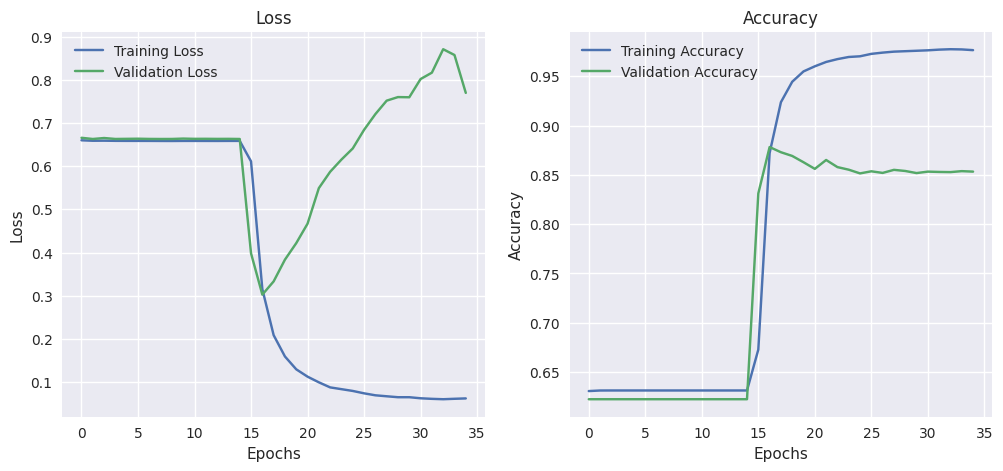

In [81]:
# plotting loss and accuracy curves for lstm history  
plot_loss_curves(lstm_1_history)

In [82]:
lstm_model_1.save('lstm_model.keras')

#### Evaluating LSTM model 

In [83]:
# predicting test text labels Probabilities with lstm 
y_scores_lstm=lstm_model_1.predict(X_test)
y_scores_lstm

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.97565573],
       [0.22856094],
       [0.9817774 ],
       ...,
       [0.98410565],
       [0.36773148],
       [0.7940259 ]], dtype=float32)

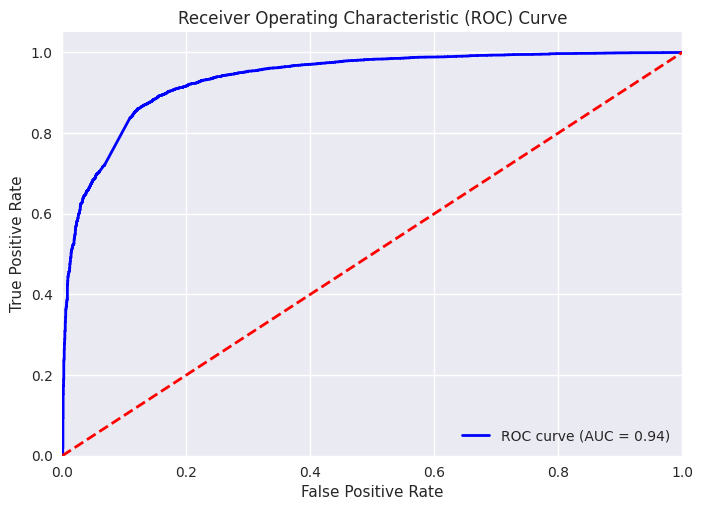

In [84]:
# plotting roc curve and calculating auc roc for lstm model predictions 
plot_roc_curve(y_test,y_scores_lstm)

In [85]:
# coverting Probabilities into binary results and calculating metrics 
y_pred_lstm=(y_scores_lstm>.5)
print('Metrics for LSTM model predictions')
lstm_results=calculate_metrics(y_test,y_pred_lstm)
lstm_results

Metrics for LSTM model predictions


{'precision': 0.885737772297575,
 'recall': 0.9129421732683753,
 'f1_score': 0.8991342442891415,
 'accuracy': 0.8730804567528547}

In [86]:
all_experiments_results['lstm_model']=lstm_results
pprint(all_experiments_results)

{'Logistic_Regression': {'accuracy': 0.8613991337445859,
                         'f1_score': 0.8934194590230117,
                         'precision': 0.8532870638133796,
                         'recall': 0.93751323872061},
 'Multinominal_nb': {'accuracy': 0.8667804173776086,
                     'f1_score': 0.8941053729786124,
                     'precision': 0.8809621710526315,
                     'recall': 0.9076466850243593},
 'Perceptron': {'accuracy': 0.8262239138994619,
                'f1_score': 0.8598645215918712,
                'precision': 0.8593188068542416,
                'recall': 0.8604109298877356},
 'SGD': {'accuracy': 0.8531303320645754,
         'f1_score': 0.8882675986020969,
         'precision': 0.8401964488099736,
         'recall': 0.9421732683753442},
 'Stacking_model': {'accuracy': 0.8637616485103032,
                    'f1_score': 0.8945978878960195,
                    'precision': 0.8591769065730447,
                    'recall': 0.9330650285956366}

### Convolutional Neural Network (CNN)  

In [87]:
# Create an embedding layer for the CNN model with embedding values loaded from FastText
pre_trained_embed = layers.Embedding(input_dim=10000, 
                                     output_dim=embedding_dim, 
                                     embeddings_initializer=Constant(embedding_matrix), 
                                     input_length=128, 
                                     trainable=True)  # Set trainable=False to freeze the pre-trained embeddings


In [88]:


# Preprocess the training text data using the text vectorizer
processed_train_text = text_vectorizer(X_train)

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(processed_train_text.shape[1],), dtype="float32")
x = pre_trained_embed(inputs)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu",  
                  kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                  bias_regularizer=regularizers.L2(1e-4),
                  activity_regularizer=regularizers.L2(1e-5))(x)

# add dropout and regulaizers to prevent overfitting 
x = layers.Dropout(0.3)(x)  # Adding dropout layer with dropout rate of 0.2
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu",  
                 kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                 bias_regularizer=regularizers.L2(1e-4),
                 activity_regularizer=regularizers.L2(1e-5))(x) 
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
cnn_model = tf.keras.Model(inputs, outputs, name="Conv1D_model")

# Compile Conv1D model
cnn_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of the 1D convolution model
cnn_model.summary()

Model: "Conv1D_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 128, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 124, 32)        │        48,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 124, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,050,209 (11.64 MB)

 Trainable params: 3,050,209 (11.64 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# fitting cnn model with early stopping and tensorboard callback 
cnn_history=cnn_model.fit(processed_train_text,y_train,validation_split=.2,epochs=100,
            callbacks=[early_stopping,
                       create_tensorboard_callback(log_dir='logs/cnn')])

Epoch 1/100


I0000 00:00:1725191664.940849     158 service.cc:145] XLA service 0x7da5cc015d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725191664.940899     158 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725191664.940903     158 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 25/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5901 - loss: 0.7078  

I0000 00:00:1725191670.919329     158 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


762/762 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7743 - loss: 0.5079 - val_accuracy: 0.8686 - val_loss: 0.3492
Epoch 2/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9023 - loss: 0.2920 - val_accuracy: 0.8699 - val_loss: 0.3532
Epoch 3/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9288 - loss: 0.2304 - val_accuracy: 0.8686 - val_loss: 0.3606
Epoch 4/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9470 - loss: 0.1825 - val_accuracy: 0.8579 - val_loss: 0.3950
Epoch 5/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9518 - loss: 0.1692 - val_accuracy: 0.8599 - val_loss: 0.4209
Epoch 6/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9589 - loss: 0.1539 - val_accuracy: 0.8591 - val_loss: 0.4189
Epoch 7/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9606 - loss: 0.1450 - val_accuracy: 0.8546 - val_loss: 0.5037
Epoch 8/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9597 - loss: 0.1480 - val_accuracy: 0.84

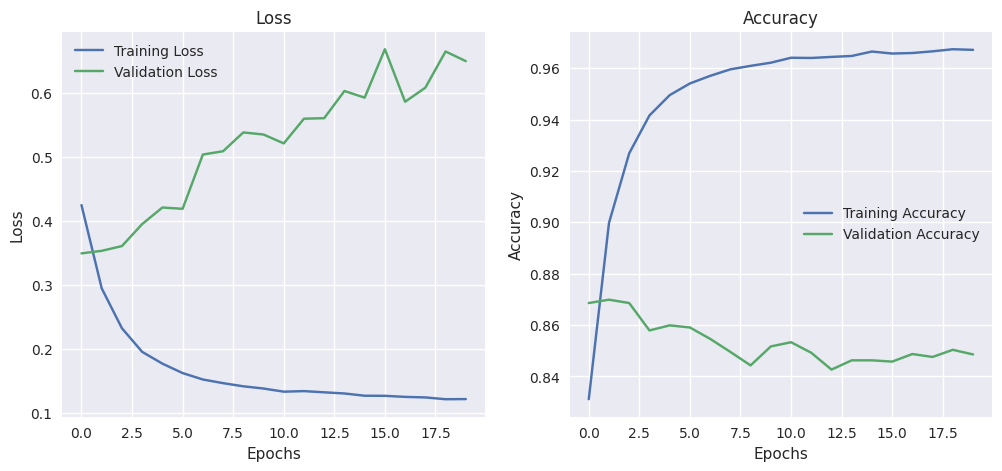

In [90]:
# plot loss and accuracy curves for cnn model 
plot_loss_curves(cnn_history)

In [91]:
cnn_model.save('cnn_model.keras')

#### Evaluating CNN model on test text 

In [92]:
processed_X_test=text_vectorizer(X_test)
# predicting probablities for test text 
y_scores_cnn=cnn_model.predict(processed_X_test)
y_scores_cnn 

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.8877682 ],
       [0.3780131 ],
       [0.9641501 ],
       ...,
       [0.96773875],
       [0.31755492],
       [0.72534865]], dtype=float32)

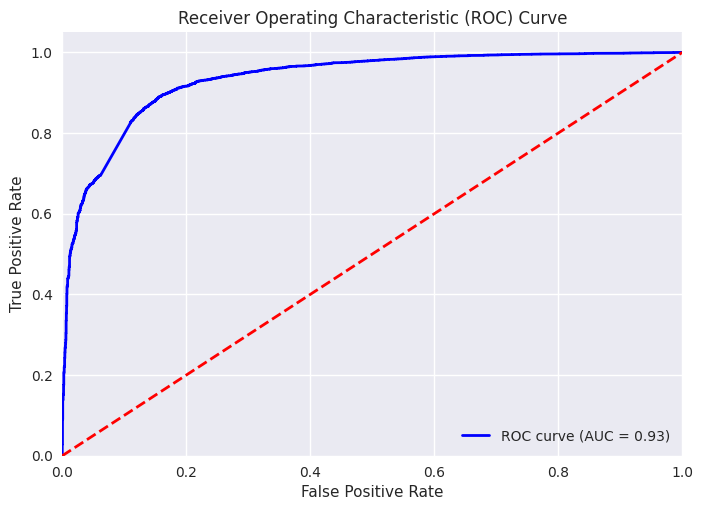

In [93]:
# plotting roc curve and calculating area under  receiver operating characteristic curve 
plot_roc_curve(y_test,y_scores_cnn)

In [94]:
# calculating metrics for cnn model 
y_pred_cnn=(y_scores_cnn>0.5)
print('Metrics for CNN model predictions')
cnn_results=calculate_metrics(y_test,y_pred_cnn)
cnn_results


Metrics for CNN model predictions


{'precision': 0.8853568498769483,
 'recall': 0.9144249099766999,
 'f1_score': 0.8996561425445451,
 'accuracy': 0.8736054600341252}

In [95]:
all_experiments_results['cnn_model']=cnn_results 
all_experiments_results

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754},
 'Perceptron': {'precision': 0.8593188068542416,
  'recall': 0.8604109298877356,
  'f1_score': 0.8598645215918712,
  'accuracy': 0.8262239138994619},
 'Stacking_model': {'precision': 0.8591769065730447,
  'recall': 0.9330650285956366,
  'f1_score': 0.8945978878960195,
  'accuracy': 0.8637616485103032},
 'Voting_model': {'precision': 0.8563396665374176,
  'recall': 0.9356068629527643,
  'f1_score': 0.8942200627593886,
  'accuracy': 0.8628428927680798},
 'lstm_model': {'precision': 0.885737772297575,
  'recall': 0.9129421732683753,
  'f1_sco

### Feed Forward Neural Network 

In [96]:
# Define the input layer, specifying the shape and data type
inputs = Input(shape=(1,), dtype=tf.string)

# Apply text vectorization to the input
x = text_vectorizer(inputs)

# Pass the vectorized input through the pre-trained embedding layer
x = pre_trained_embed(x)

# Apply global average pooling to reduce the dimensions of the feature maps
x = layers.GlobalAveragePooling1D()(x)

# Add a dropout layer with a 30% dropout rate to prevent overfitting
x = layers.Dropout(0.3)(x)

# Define the output layer with a single unit and a sigmoid activation function for binary classification
outputs = Dense(1, activation='sigmoid')(x)

# Create the dense model by specifying the inputs and outputs
dense_model = Model(inputs, outputs, name='dense_model')

# Compile the model with binary crossentropy loss, accuracy metric, and Adam optimizer
dense_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# Print the summary of the model architecture
dense_model.summary()


Model: "dense_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorizer                 │ (None, 128)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 128, 300)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 300)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,301 (11.45 MB)

 Trainable params: 3,000,301 (11.45 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    mode='min', 
    verbose=1
)

# Train the dense model on the training data
dense_history = dense_model.fit(
    X_train,                # Training features
    y_train,                # Training labels
    validation_split=0.1,   # Reserve 10% of the training data for validation
    epochs=30,              # Train for 30 epochs
    callbacks=[             # List of callback functions to apply during training
        early_stopping,     # Stop training early if validation loss doesn't improve
        create_tensorboard_callback(log_dir='logs/dense_model')  # Log training metrics for TensorBoard visualization
    ]
)

Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6500 - loss: 0.6340 - val_accuracy: 0.7231 - val_loss: 0.5714
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7319 - loss: 0.5481 - val_accuracy: 0.7635 - val_loss: 0.4740
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8015 - loss: 0.4533 - val_accuracy: 0.8264 - val_loss: 0.4097
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8294 - loss: 0.4010 - val_accuracy: 0.8645 - val_loss: 0.3927
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8494 - loss: 0.3662 - val_accuracy: 0.8222 - val_loss: 0.3915
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8487 - loss: 0.3538 - val_accuracy: 0.8599 - val_loss: 0.3490
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8602 - loss: 0.3343 - val_accuracy: 0.8543 - val_loss: 0.3465
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8661 - loss: 0.3252 - val_accuracy: 0.

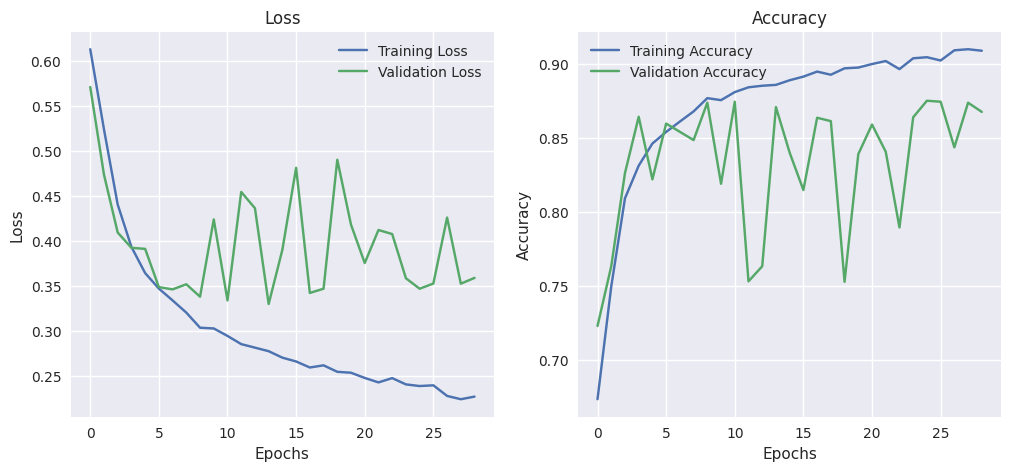

In [98]:
# plotting loss and accuracy curves for fitted dense model 
plot_loss_curves(dense_history)

#### Evaluating Dense model , saving it and evaluating loaded model  

In [99]:
# predicting probabilites of Sentimnets using dense model 
y_scores_dense=dense_model.predict(X_test)
y_scores_dense

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.89592314],
       [0.5105315 ],
       [0.981457  ],
       ...,
       [0.99075365],
       [0.4688631 ],
       [0.71198845]], dtype=float32)

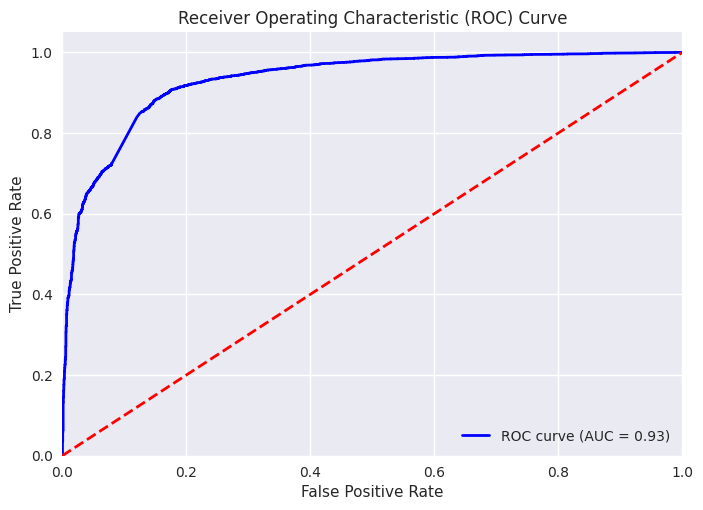

In [100]:
# plotting roc curve and calculating auc roc  
plot_roc_curve(y_test,y_scores_dense)

In [101]:
# calculating metrics for dense model predictions 
y_pred_dense=(y_scores_dense>0.5)
calculate_metrics(y_test,y_pred_dense)

{'precision': 0.8654717352767383,
 'recall': 0.9307350137682694,
 'f1_score': 0.8969177383139417,
 'accuracy': 0.8674366714791968}

In [102]:
# saving dense model 
dense_model.save('dense_model.keras')

In [103]:
from keras.models import load_model 
# loading and evaluatiing dense model 
loaded_dense_model=load_model('/kaggle/working/dense_model.keras')
loaded_dense_model.evaluate(X_test,y_test)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.3376


[0.3368828296661377, 0.8674366474151611]

In [104]:
# predicting test text probabilities using loaded dense model 
y_scores_loaded_dense_model=loaded_dense_model.predict(X_test)
y_scores_loaded_dense_model

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.89592314],
       [0.5105315 ],
       [0.981457  ],
       ...,
       [0.99075365],
       [0.4688631 ],
       [0.71198845]], dtype=float32)

In [105]:
# converting probabilities into labels of 0 and 1 with threshold 0.5 where x>.5 is 1 and x<.5 is 0 
y_pred_loaded_dense_model=(y_scores_loaded_dense_model>.5)
dense_results=calculate_metrics(y_test,y_pred_loaded_dense_model)
dense_results

{'precision': 0.8654717352767383,
 'recall': 0.9307350137682694,
 'f1_score': 0.8969177383139417,
 'accuracy': 0.8674366714791968}

In [106]:
# adding dense model results to all experiments dictionary 
all_experiments_results['dense_model']=dense_results
all_experiments_results

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754},
 'Perceptron': {'precision': 0.8593188068542416,
  'recall': 0.8604109298877356,
  'f1_score': 0.8598645215918712,
  'accuracy': 0.8262239138994619},
 'Stacking_model': {'precision': 0.8591769065730447,
  'recall': 0.9330650285956366,
  'f1_score': 0.8945978878960195,
  'accuracy': 0.8637616485103032},
 'Voting_model': {'precision': 0.8563396665374176,
  'recall': 0.9356068629527643,
  'f1_score': 0.8942200627593886,
  'accuracy': 0.8628428927680798},
 'lstm_model': {'precision': 0.885737772297575,
  'recall': 0.9129421732683753,
  'f1_sco

### Camelbert

> Another Experiment With pre-trained Camelbert from huggingface which is a model for sentiment analysis of arabic text 

In [107]:
!pip install camel_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 14.4 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 91.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.0 MB/s eta 0:00:00
  Created wheel for camel-kenlm: filename=camel_kenlm-2024.5.6-cp310-cp310-linux_x86_64.whl size=587534 sha256=92ffad5392d1e98637e6584875727739463f2124e853ef8a18aac0188c8d2900
  Stored in directory: /root/.cache/pip/wheels/2b/93/ff/ac84dae74c91ffe3e1c344a71f991946eacc79eada61cb703f
Successfully built camel-kenlm
  Attempting uninstall: transformers
    Found existing 

In [108]:
from camel_tools.sentiment import SentimentAnalyzer
# loading model 
sa = SentimentAnalyzer("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")
sentences = ['أنا بخير', 'أنا لست بخير']
# predicting sentiment of sentences using loaded model  
sa.predict(sentences)


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

['positive', 'negative']

In [109]:
# Select a random row index from the DataFrame
row = random.choice(cleaned_df.index)
print(f'row: {row}')  # Print the index of the selected row

# Print the rating of the selected review
print('rating:', cleaned_df.iloc[row, :]['rating'])

# Extract the review description from the selected row
review = cleaned_df.iloc[row, :]['review_description']
print(review)  # Print the review description

# Predict sentiment of the review using the sentiment analysis model
print(sa.predict(review))  # Print the sentiment prediction


row: 20254
rating: 1
برنامج جميل جداً و التوصيل رخيص ومش غالي كباقي التطبيقات
['positive']


In [133]:

# Start measuring time
start = time.time()

# Extract review descriptions from the DataFrame
reviews = df['review_description'].values 

# Initialize an empty list to store predictions
hf_predictions = []
from tqdm import tqdm 
# Loop through each review in the list
for r in tqdm(reviews):
    # Predict sentiment for the current review and append the result to the predictions list
    hf_predictions.append(sa.predict(r)[0])

# End measuring time
end = time.time()

# Print the total time taken in minutes
print(f'Total time in minutes:', (end - start) // 60)


100%|██████████| 40017/40017 [09:08<00:00, 72.93it/s]

Total time in minutes: 9.0


In [143]:
# Initialize an empty list to store the processed results
hf_results = []

# Iterate over each prediction in the hf_predictions list
for r in hf_predictions:
    # Convert sentiment prediction to numerical values
    if r == 'positive':
        hf_results.append(1)   # Append 1 for positive sentiment
    elif r == 'negative':
        hf_results.append(-1)  # Append -1 for negative sentiment
    else:
        hf_results.append(0)   # Append 0 for neutral or unknown sentiment

# Print the final list of processed results
hf_results[:20]


[1, 1, -1, 0, 0, -1, 1, -1, -1, -1, 1, -1, -1, 0, -1, 1, 1, 0, 1, -1]

In [144]:
# adding column of camelbert predictions to data 
df['hf_predictions']=hf_results
df 

,review_description,rating,company,length,hf_predictions
0,رائع,1,talbat,4,1
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat,52,1
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat,84,-1
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat,34,0
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat,75,0
...,...,...,...,...,...
40041,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,0,swvl,111,-1
40042,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,-1,swvl,62,0
40043,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,0,swvl,80,0
40044,جيدا جدا ...ولكن الاسعار عاليه جدا\n,0,swvl,35,1


In [145]:
# display classification report of camelbert predictions 
print(classification_report(df['rating'],df.hf_predictions))

              precision    recall  f1-score   support

          -1       0.77      0.69      0.73     14196
           0       0.09      0.44      0.15      1924
           1       0.92      0.68      0.78     23897

    accuracy                           0.68     40017
   macro avg       0.59      0.61      0.55     40017
weighted avg       0.82      0.68      0.73     40017



In [146]:
# calculating mertics for camelbert predictions 
print(calculate_metrics(df['rating'],df.hf_predictions,average='macro'))

{'precision': 0.5922638657559071, 'recall': 0.6053912915419509, 'f1_score': 0.5542530174288669, 'accuracy': 0.6759127370867382}


results for camel bert
Confusion matrix, without normalization


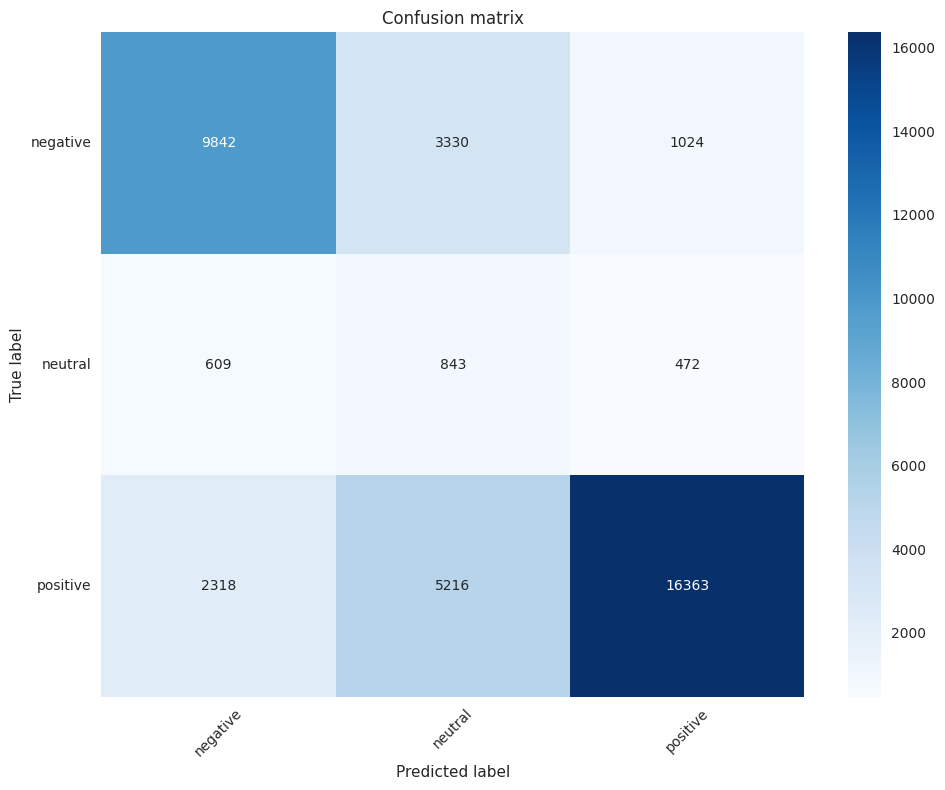

In [147]:
# plotting cofusion matrix of camelbert predictions 
print('results for camel bert')
plot_confusion_matrix(df['rating'],df.hf_predictions,classes=['negative','neutral','positive'])

## Speed Of Classification For Real Time Prediction

In [111]:
# Take a random sample of 1% of the test dataset
test_sample = X_test.sample(frac=0.01)

# Return the sample and its length
test_sample, len(test_sample)

(18169                         افضل تطبيق طلب طعام استخدمته
 6022                                    سهل كتير على الناس
 10317    نزلت البرنامج ومش جالي ولا عرض ولا قسيمة ولاكو...
 14297                                 ممتاز كل في تخفيضاات
 31256    عطيته 2 لاني توهقت مع نظام الحد الاقصى للدفع ع...
                                ...                        
 10764    انصح الجميع بعدم التعامل مع هذا التطبيق الفاشل...
 38468                                                 good
 453      سي جدا على الرغم من وضوح العنوان إلا أن الطيار...
 3571                                            گەلەک خوشە
 30790                           الووووو انت ناصر عبدالعزيز
 Name: review_description, Length: 76, dtype: object,
 76)

### MultinomialNB 

In [112]:
# Define a function to test prediction speed of a model
def test_prediction_speed(model, test_sample):
    """
    Test the prediction speed of a given model on a sample dataset.

    This function measures the time taken by the model to make predictions
    on the provided test sample and calculates the average prediction time
    per sample. It's useful for benchmarking model performance in terms of
    prediction speed.

    Parameters:
    -----------
    model : object
        A machine learning model object that has a 'predict' method.
        This could be any sklearn estimator or a custom model with a similar interface.

    test_sample : array-like
        The sample dataset to make predictions on. This should be compatible
        with the input expected by the model's predict method.

    Returns:
    --------
    None
        This function doesn't return anything. It prints the average prediction
        time per sample to the console.

    Prints:
    -------
    str
        A formatted string showing the average prediction time per sample in seconds.

    Notes:
    ------
    - The function assumes that the model has a 'predict' method.
    - The total prediction time is divided by the number of samples to get the average time per sample.
    - This function uses the 'time' module to measure elapsed time, which may not be precise for very fast predictions.

    Example:
    --------
    >>> from sklearn.dummy import DummyClassifier
    >>> import numpy as np
    >>> model = DummyClassifier().fit(np.array([[1], [2]]), [0, 1])
    >>> test_sample = np.array([[1], [2], [3]])
    >>> test_prediction_speed(model, test_sample)
    Average prediction Time of single Review : 0.000123 seconds
    """
    # Record the start time
    start = time.time()
    
    # Make predictions on the test sample
    model.predict(test_sample)
    
    # Record the end time
    end = time.time()
    
    # Calculate average prediction time per sample
    average_time = (end - start) / len(test_sample)
    
    # Print the result
    print(f'Average prediction Time of single Review : {average_time} seconds')



In [113]:
# loading saved multinominal Naive bayes 
loaded_multinominal_nb=joblib.load('/kaggle/working/MultinomialNB.pkl')

In [114]:
# testing prediction time for loaded multinominal Naive bayes 
test_prediction_speed(loaded_multinominal_nb,test_sample)

Average prediction Time of single Review : 4.305337604723478e-05 seconds


### LogisticRegression 

In [115]:
# loading saved logisctic regresssion calssifier 
loaded_logistic_regression=joblib.load('/kaggle/working/LogisticRegression.pkl')

In [116]:
# testing average prediction time for loaded logisctic regresssion calssifier   

test_prediction_speed(loaded_logistic_regression,test_sample)

Average prediction Time of single Review : 3.530790931300113e-05 seconds


### SGDClassifier

In [117]:
# loading saved SGD calssifier 
loaded_sgd=joblib.load('/kaggle/working/SGDClassifier.pkl')

In [118]:
# testing average prediction time for loaded sgd classifier  
test_prediction_speed(loaded_sgd,test_sample)

Average prediction Time of single Review : 2.7553031319066097e-05 seconds


## Comapring models results 

In [119]:
# all applied experiments 
all_experiments_results

{'Multinominal_nb': {'precision': 0.8809621710526315,
  'recall': 0.9076466850243593,
  'f1_score': 0.8941053729786124,
  'accuracy': 0.8667804173776086},
 'Logistic_Regression': {'precision': 0.8532870638133796,
  'recall': 0.93751323872061,
  'f1_score': 0.8934194590230117,
  'accuracy': 0.8613991337445859},
 'SGD': {'precision': 0.8401964488099736,
  'recall': 0.9421732683753442,
  'f1_score': 0.8882675986020969,
  'accuracy': 0.8531303320645754},
 'Perceptron': {'precision': 0.8593188068542416,
  'recall': 0.8604109298877356,
  'f1_score': 0.8598645215918712,
  'accuracy': 0.8262239138994619},
 'Stacking_model': {'precision': 0.8591769065730447,
  'recall': 0.9330650285956366,
  'f1_score': 0.8945978878960195,
  'accuracy': 0.8637616485103032},
 'Voting_model': {'precision': 0.8563396665374176,
  'recall': 0.9356068629527643,
  'f1_score': 0.8942200627593886,
  'accuracy': 0.8628428927680798},
 'lstm_model': {'precision': 0.885737772297575,
  'recall': 0.9129421732683753,
  'f1_sco

In [120]:
num_experiments=len(all_experiments_results)
print(f'{num_experiments} Experiments Were applied')

9 Experiments Were applied


In [121]:
results_df=pd.DataFrame(all_experiments_results).T 
results_df

,precision,recall,f1_score,accuracy
Multinominal_nb,0.880962,0.907647,0.894105,0.866780
Logistic_Regression,0.853287,0.937513,0.893419,0.861399
SGD,0.840196,0.942173,0.888268,0.853130
Perceptron,0.859319,0.860411,0.859865,0.826224
Stacking_model,0.859177,0.933065,0.894598,0.863762
Voting_model,0.856340,0.935607,0.894220,0.862843
lstm_model,0.885738,0.912942,0.899134,0.873080
cnn_model,0.885357,0.914425,0.899656,0.873605
dense_model,0.865472,0.930735,0.896918,0.867437


In [122]:
results_df.to_csv('results.csv')

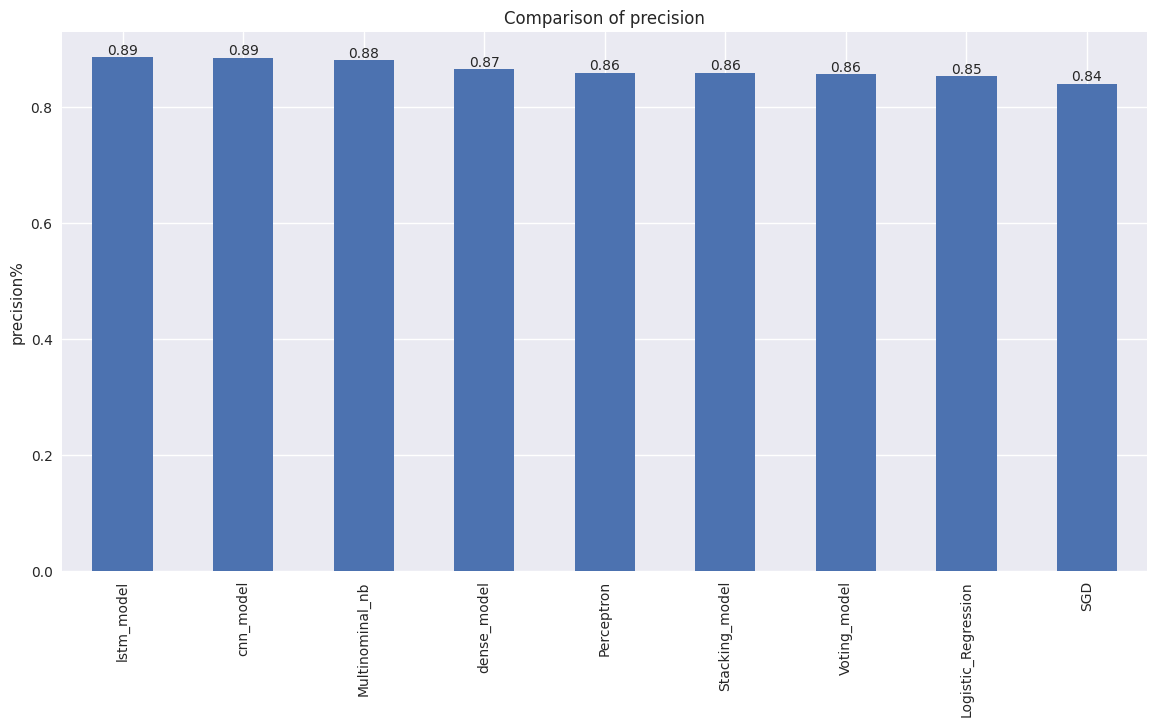

In [123]:

def comparsion_bar_plot(column: str,color=None):
    """
    Creates a bar plot to compare the specified column in the results dataframe.

    Parameters:
    column (str): The name of the column in the dataframe to be plotted.
    color (str, optional): The color of the bars in the plot. If not specified, the default color will be used.

    Returns:
    None: The function displays a bar plot and does not return any value.
    """
    
    plt.figure(figsize=(14,7))
    # Sort values in descending order
    sorted_values = results_df[column].sort_values(ascending=False)
    
    # Create a bar plot
    ax = sorted_values.plot(kind='bar',color=color)
    
    # Add the title and labels
    plt.title(f'Comparison of {column}')
    plt.ylabel(f'{column}%')
    
    # Display the values on top of each bar
    for i, value in enumerate(sorted_values):
        ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    
    # Show the plot
    plt.show()
comparsion_bar_plot('precision')    

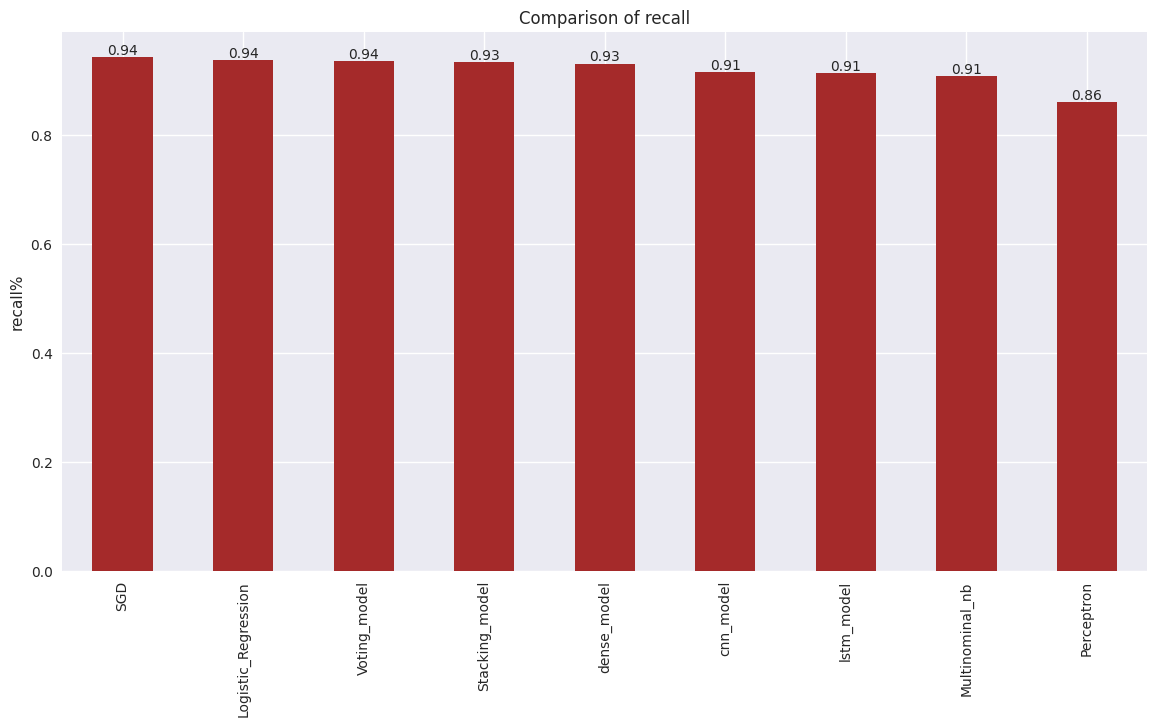

In [124]:
comparsion_bar_plot('recall',color='brown')    

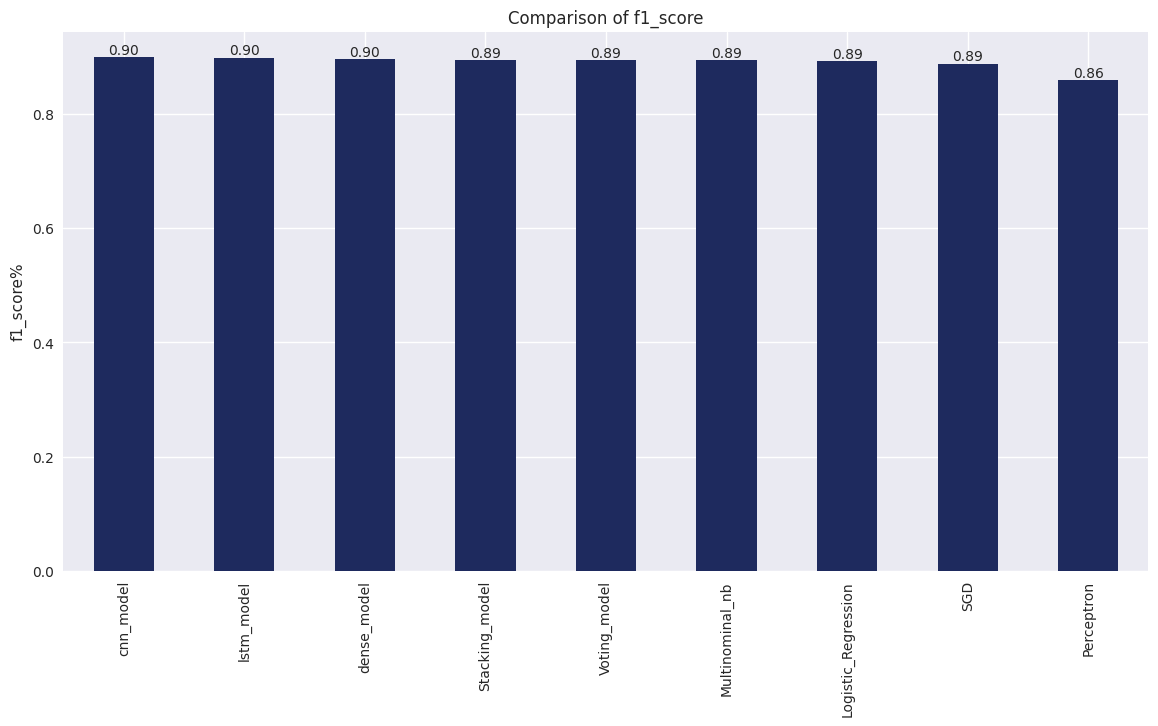

In [125]:
comparsion_bar_plot('f1_score',color='#1E2A5E')    

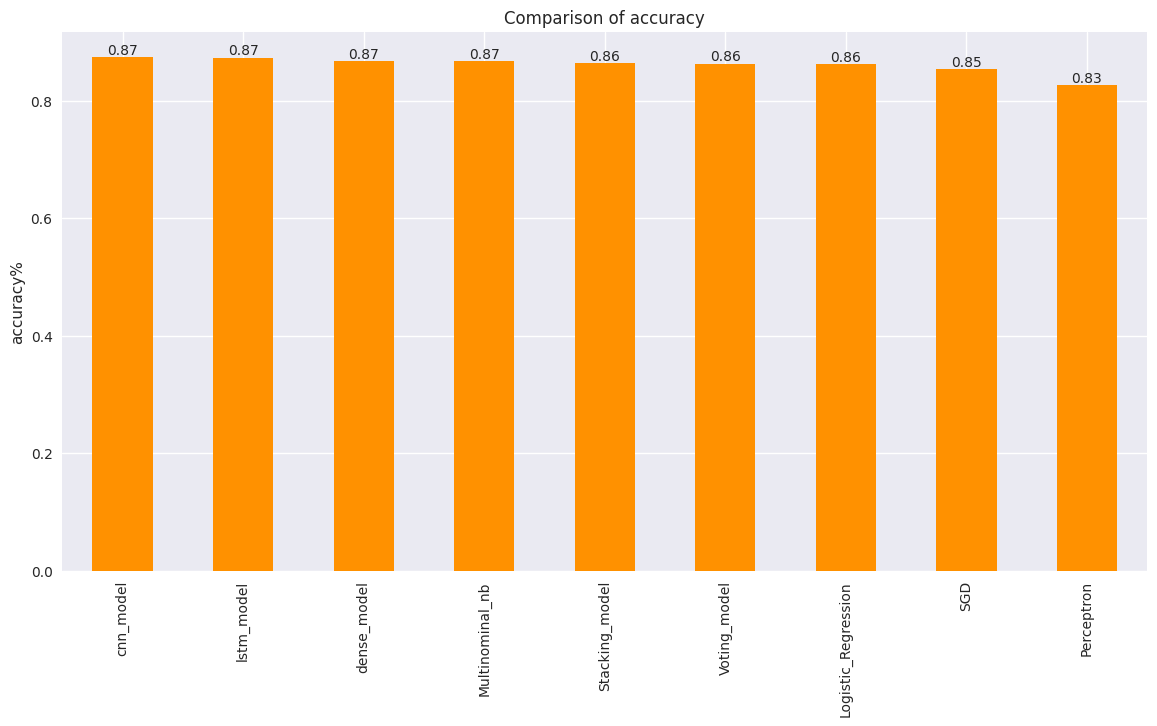

In [126]:
comparsion_bar_plot('accuracy',color='#FF9100')    

> we decided to choose Stacking model 

### predicting single message Sentiment

In [127]:
def predict_review_sentiment(review: str) -> str:
    """
    Predicts the sentiment of a given review using a pre-trained stacking model.

    Parameters:
    review (str): The review text to be classified.

    Returns:
    None: The function prints whether the review is classified as positive or negative.
    """

    # Transform the input review using the loaded CountVectorizer
    transformed_review = loaded_vectorizer.transform([review])

    # Predict the sentiment class using the loaded stacking model
    pred = loaded_stacking_model.predict(transformed_review)

    # Output the sentiment class based on the prediction
    if pred == 0:
        return 'Negative Review'
    else:
        return 'Positive Review'

review='الخدمة سيئة جدا ، هذه أخر مرة أشتري هذا المنتج'
predict_review_sentiment(review)     

'Negative Review'

In [128]:
review='الخدمة ممتازة جدا ، هل هناك فروع أخري؟'
predict_review_sentiment(review)     

'Positive Review'

In [129]:
review='لفت انتباهي سرعة الرد والاستجابة للطلبات ، شكرا لكم'
predict_review_sentiment(review) 

'Positive Review'

In [130]:
review='لماذا الرد بطيئ ؟'
predict_review_sentiment(review) 

'Negative Review'

In [131]:
!pip install gradio 


### A User Interface for Sentiment Prediction 

In [156]:
import gradio as gr 
# Add examples and styling to the interface
interface = gr.Interface(
    fn=predict_review_sentiment,  # The function to be called for predictions
    inputs=gr.Textbox(lines=2, placeholder="Enter a review here..."),  # Multi-line input textbox for user reviews
    outputs="text",  # The output will be displayed as text
    examples=[["الخدمة ممتازة جدا ، هل هناك فروع أخري؟"], ["لماذا الرد بطيئ ؟"]],  # Example reviews provided for user reference
    title="Arabic Sentiment Analysis",  # Title of the interface
    description="Enter a review to classify it as positive or negative.",  # Brief description of what the interface does
    theme="default",  # The visual theme of the interface, can be customized
#     live=True  # Set to True to enable real-time prediction as the user types
)

# Launch the Gradio interface
interface.launch(share=False)


Running on local URL:  http://0.0.0.0:8080
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://5e3d7fb0969d8af6df.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
